<H1 style="background-color:DodgerBlue;">Binary Prediction of Poisonous Mushrooms</H1>

![Poisonous Mushrooms](https://www.pexels.com/photo/beautiful-but-poisonous-mushrooms-13977301/)

Our goal in this competition is to predict whether a mushroom is poisonous represented by 'p' or edible which is represented by 'e'.







## Library Imports

In [1]:
%pip install catboost
%pip install optuna
%pip install optuna_distributed
%pip install openfe
%pip install seaborn
%pip install xgboost
%pip install lightgbm
%pip install fastkaggle
%pip install h2o
%pip install -Uqq fastbook
%pip install polars
%pip install -q -U autogluon.tabular
%pip install autogluon
%pip install wandb xgboost
#ip install --upgrade pip

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [ ]:
%pip install wandb xgboost

In [3]:
%pip freeze > requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [2]:
import fastbook
fastbook.setup_book()
from fastbook import *
from fastai.tabular.all import *
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from numpy import random
from tqdm import tqdm
from ipywidgets import interact

from fastai.imports import *
np.set_printoptions(linewidth=130)


from pathlib import Path
import os


from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier
from sklearn.metrics import roc_auc_score,accuracy_score,mean_squared_error, matthews_corrcoef
from sklearn.model_selection import train_test_split,StratifiedKFold
from sklearn.ensemble import VotingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold, cross_val_score



#transformers and pipeline
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn import set_config

import xgboost as xgb
from xgboost import plot_importance
from xgboost import XGBClassifier

import lightgbm as lgb
from lightgbm import LGBMClassifier

from catboost import CatBoostClassifier,CatBoostRegressor,Pool, metrics, cv





import optuna
from optuna.samplers import TPESampler
from optuna.visualization import plot_contour
from optuna.visualization import plot_edf
from optuna.visualization import plot_intermediate_values
from optuna.visualization import plot_optimization_history
from optuna.visualization import plot_parallel_coordinate
from optuna.visualization import plot_param_importances
from optuna.visualization import plot_slice
from optuna.samplers import TPESampler
import warnings


matplotlib.rc('image', cmap='Greys')

from fastkaggle import setup_comp



from openfe import OpenFE, transform
from autogluon.tabular import TabularDataset, TabularPredictor

import h2o
from h2o.automl import H2OAutoML

import gc

from xgboost import plot_importance
import wandb
from fastai.callback.wandb import *
from wandb.integration.lightgbm import wandb_callback, log_summary
#from wandb.xgboost import wandb_callback



#from IPython.display import FileLink

/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [2]:
#! mkdir ~/.kaggle

#! cp kaggle.json ~/.kaggle/

#!chmod 600 /root/.kaggle/kaggle.json

In [3]:
#comp = 'playground-series-s4e8'

#path = setup_comp(comp, install='fastai "timm>=0.6.2.dev0"')


In [4]:
!ls

AutogluonModels  playground-series-s4e8		     requirements.txt
main.py		 playground-series-s4e8.zip	     wandb
models		 poisonous_mushrooms_classification  xgb_model.json


In [4]:
# start logging a wandb run
wandb.init(project='s04e08_fastai_lgbm')

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


wandb: Currently logged in as: rikugan (rikugandev). Use `wandb login --relogin` to force relogin


In [3]:
path = Path('playground-series-s4e8/')
path

Path('playground-series-s4e8')

In [4]:
train_df = pd.read_csv(path/'train.csv',index_col='id')
test_df = pd.read_csv(path/'test.csv',index_col='id')
sub_df = pd.read_csv(path/'sample_submission.csv')

In [5]:
train_df.shape,test_df.shape

((3116945, 21), (2077964, 20))

In [6]:
train_df

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
id,,,,,,,,,,,,,,,,,,,,,
0,e,8.80,f,s,u,f,a,c,w,4.51,15.39,NaN,NaN,w,NaN,NaN,f,f,NaN,d,a
1,p,4.51,x,h,o,f,a,c,n,4.79,6.48,NaN,y,o,NaN,NaN,t,z,NaN,d,w
2,e,6.94,f,s,b,f,x,c,w,6.85,9.93,NaN,s,n,NaN,NaN,f,f,NaN,l,w
3,e,3.88,f,y,g,f,s,NaN,g,4.16,6.53,NaN,NaN,w,NaN,NaN,f,f,NaN,d,u
4,e,5.85,x,l,w,f,d,NaN,w,3.37,8.36,NaN,NaN,w,NaN,NaN,f,f,NaN,g,a
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3116940,e,9.29,f,NaN,n,t,NaN,NaN,w,12.14,18.81,b,NaN,w,u,w,t,g,NaN,d,u
3116941,e,10.88,s,NaN,w,t,d,c,p,6.65,26.97,NaN,NaN,w,NaN,NaN,f,f,NaN,d,u
3116942,p,7.82,x,e,e,f,a,NaN,w,9.51,11.06,NaN,NaN,y,NaN,w,t,z,NaN,d,a


In [7]:
train_df.isnull().sum()

class                         0
cap-diameter                  4
cap-shape                    40
cap-surface              671023
cap-color                    12
does-bruise-or-bleed          8
gill-attachment          523936
gill-spacing            1258435
gill-color                   57
stem-height                   0
stem-width                    0
stem-root               2757023
stem-surface            1980861
stem-color                   38
veil-type               2957493
veil-color              2740947
has-ring                     24
ring-type                128880
spore-print-color       2849682
habitat                      45
season                        0
dtype: int64

In [8]:
test_df.isnull().sum()

cap-diameter                  7
cap-shape                    31
cap-surface              446904
cap-color                    13
does-bruise-or-bleed         10
gill-attachment          349821
gill-spacing             839595
gill-color                   49
stem-height                   1
stem-width                    0
stem-root               1838012
stem-surface            1321488
stem-color                   21
veil-type               1971545
veil-color              1826124
has-ring                     19
ring-type                 86195
spore-print-color       1899617
habitat                      25
season                        0
dtype: int64

Add NaN value to the stem-height column in the train set

In [9]:
# Make a copy of the training dataframe to avoid modifying the original
train_df_with_nan = train_df.copy()

# Add a NaN value to a random row in the 'stem-height' column
random_index = np.random.choice(train_df_with_nan.index)
train_df_with_nan.loc[random_index, 'stem-height'] = np.nan

# Verify the NaN was added
print(train_df_with_nan['stem-height'].isna().sum())

1


## Subset

In [7]:
train_subset = train_df.sample(n=1000000,replace=False)
test_subset = test_df.sample(n=500000,replace=False)

In [10]:
train_df_with_nan['class']

NameError: name 'train_df_with_nan' is not defined

# Full Dataset

#### With original features

In [10]:
cont_names,cat_names = cont_cat_split(train_df_with_nan, dep_var='class')
len(cat_names),len(cont_names)

(17, 3)

Below, i use fastai's RandomSplitter to divide my dataset into a train and validation set, in this example it creates a validation set with 20% of the training dataset.


In [11]:
splits = RandomSplitter(valid_pct=0.2)(range_of(train_df_with_nan))

Below i build a TabularPandas Object which is a subclass of the Tabular class that has methods we can use to handle tabular data preparation and preprocessing.

This object takes in arguments where i define my training dataset and preprocessing steps i.e. Categorify, FillMissing,Normalize.

We also define our categorical and continuous variables resulting from the cont_cat_split.
Furthermore, i define my Target variable, the y which in this case is Response, y_block represents the type of problem.

Lastly we have the splits argument which was defined above and represents the dataset split.

In [12]:
to = TabularPandas(train_df_with_nan, procs=[Categorify, FillMissing,Normalize],
                   cat_names = cat_names,
                   cont_names = cont_names,
                   y_names='class',
                   y_block=CategoryBlock(),
                   splits=splits)

In [13]:
to.xs.iloc[:2]

,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season,cap-diameter_na,stem-height_na,cap-diameter,stem-height,stem-width
id,,,,,,,,,,,,,,,,,,,,,,
547711,72,60,62,9,45,0,49,0,0,56,0,0,6,19,23,30,1,1,1,-0.948561,-0.851246,-1.081126
303590,72,56,64,9,53,0,60,0,59,56,20,22,19,28,0,26,3,1,1,0.451292,0.741772,0.548564


In [14]:
dls = to.dataloaders(bs=64)
#dls = to.dataloaders(bs=1024)
test_dl = dls.test_dl(test_df)

Dealing with missing values present in the test set column for stem-height yet not there in the training set

In [15]:
#test_df = test_df.fillna(0)

#modify to only nan the values in the stem-height

In [16]:
X_train, y_train = to.train.xs, to.train.ys.values.ravel()
X_test, y_test = to.valid.xs, to.valid.ys.values.ravel()

In [17]:
dls.show_batch()

,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season,cap-diameter_na,stem-height_na,cap-diameter,stem-height,stem-width,class
0,b,y,n,f,#na#,c,k,#na#,#na#,w,#na#,#na#,f,f,#na#,d,u,False,False,3.12,6.73,3.08,e
1,b,g,n,f,a,d,g,#na#,#na#,n,#na#,#na#,f,f,#na#,d,u,False,False,4.74,5.53,3.26,e
2,s,#na#,e,t,d,c,w,#na#,#na#,n,#na#,#na#,f,f,#na#,d,u,False,False,6.54,6.62,6.70,p
3,c,#na#,n,f,f,f,f,#na#,#na#,n,#na#,#na#,f,f,#na#,d,s,False,False,6.12,5.80,21.25,e
4,b,t,y,f,#na#,c,k,#na#,#na#,n,#na#,#na#,t,f,#na#,m,a,False,False,0.92,3.60,2.68,p
5,x,g,n,f,d,d,n,#na#,s,n,#na#,#na#,f,f,#na#,h,u,False,False,1.59,2.16,2.59,p
6,x,s,n,t,p,#na#,y,c,#na#,y,#na#,#na#,f,f,#na#,d,u,False,False,13.99,8.33,31.09,p
7,x,y,w,f,e,c,p,#na#,#na#,w,#na#,w,t,e,#na#,g,u,False,False,8.58,5.40,13.31,e
8,b,#na#,g,f,a,#na#,n,#na#,#na#,g,#na#,w,f,f,k,g,a,False,False,2.93,9.05,2.47,p
9,x,y,w,t,#na#,#na#,p,s,#na#,w,#na#,#na#,t,l,#na#,g,u,False,False,7.79,8.07,14.70,p


In [17]:
import torch
print(torch.cuda.is_available())
#print(torch.cuda.current_device())

False


# Neural Network

In [19]:
#!mkdir models

In [18]:
learn = tabular_learner(dls, metrics=MatthewsCorrCoef(),cbs=[WandbCallback(log_dataset=True, log_model=True), SaveModelCallback()])
#learn.fit_one_cycle(10)

In [25]:
learn = tabular_learner(dls, metrics=MatthewsCorrCoef())
#learn.fit_one_cycle(10)

In [26]:
learn.load('mushroom_prediction_model_colab')

In [27]:
learn = tabular_learner(dls, metrics=MatthewsCorrCoef())
#learn.fit_one_cycle(10)
learn.fit_one_cycle(5)

epoch,train_loss,valid_loss,matthews_corrcoef,time
0,0.046835,0.042470,0.982192,03:54
1,0.042573,0.039661,0.982958,04:00
2,0.040564,0.039222,0.983481,04:02
3,0.049747,0.038319,0.983774,04:04
4,0.039748,0.038052,0.983958,04:01


In [28]:
dl = test_dl
nn_preds = learn.get_preds(dl=dl)
nn_preds_x = learn.get_preds()[0]
a_preds, _ = learn.get_preds(dl=dl)
nn_preds_y = a_preds.squeeze(1)
nn_preds_proba_b = (a_preds[:, 1])

In [29]:
final_preds_scoring = nn_preds_x[:, 1]
final_preds = nn_preds_y[:, 1]

In [30]:
rounded_nn_scoring_preds = torch.round(final_preds_scoring).long()
rounded_nn_scoring_preds

tensor([0, 0, 0,  ..., 0, 1, 1])

In [31]:
nn_score = matthews_corrcoef(y_test,rounded_nn_scoring_preds)
nn_score

0.9839584199879363

In [32]:
nn_score = matthews_corrcoef(y_test,rounded_nn_scoring_preds)
rounded_nn_sub_preds = torch.round(final_preds).long()
rounded_nn_sub_preds

tensor([0, 1, 1,  ..., 1, 0, 0])

In [32]:
mapping = dict(enumerate(dls.vocab))
submit = pd.read_csv(path/'sample_submission.csv')
submit['class'] = [mapping[pred.item()] for pred in rounded_nn_sub_preds]
submit.to_csv('submission.csv', index=False)
sub = pd.read_csv('submission.csv')
print(sub)

              id class
0        3116945     e
1        3116946     p
2        3116947     p
3        3116948     p
4        3116949     e
...          ...   ...
2077959  5194904     p
2077960  5194905     p
2077961  5194906     p
2077962  5194907     e
2077963  5194908     e

[2077964 rows x 2 columns]


In [24]:
!rm submission.csv

rm: cannot remove 'submission.csv': No such file or directory


In [33]:
!kaggle competitions submit -c playground-series-s4e8 -f submission.csv -m "[Neural Network] Silver Rubanza, fastai Neural network initial try - lightning  "

100%|██████████████████████████████████████| 19.8M/19.8M [00:00<00:00, 52.8MB/s]
Successfully submitted to Binary Prediction of Poisonous Mushrooms

In [1]:
cat_names = ['Gender', 'Age', 'Driving_License', 'Region_Code', 'Previously_Insured','Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium','Policy_Sales_Channel', 'Vintage']
cont_names = []
#cont_names,cat_names = cont_cat_split(train_df, dep_var='Response')
splits = RandomSplitter(valid_pct=0.2)(range_of(train_df))
to = TabularPandas(train_df, procs=[Categorify, FillMissing,Normalize],
                   cat_names = cat_names,
                   cont_names = cont_names,
                   y_names='Response',
                   y_block=CategoryBlock(),
                   splits=splits)
dls = to.dataloaders(bs=1024)
test_dl = dls.test_dl(test_df)
X_train, y_train = to.train.xs, to.train.ys.values.ravel()
X_test, y_test = to.valid.xs, to.valid.ys.values.ravel()

NameError: name 'RandomSplitter' is not defined

Custom learner

In [147]:
emb_szs = {
    var: int(min(64, round(1.6 * len(to.classes[var]) ** .56)))
    for var in to.cats.columns
}
emb_szs

{'Gender': 3,
 'Age': 17,
 'Driving_License': 3,
 'Region_Code': 15,
 'Previously_Insured': 3,
 'Vehicle_Age': 3,
 'Vehicle_Damage': 3,
 'Annual_Premium': 64,
 'Policy_Sales_Channel': 27,
 'Vintage': 38}

In [148]:
learn = tabular_learner(
    dls,
    emb_szs=emb_szs,
    layers=[200, 100],
    config=dict(ps=[0.3, 0.3],embed_p=0.3),
    metrics=RocAucBinary())

In [149]:
learn.load('/kaggle/input/fastai_nn/pytorch/default/1/nn_model')

RuntimeError: Error(s) in loading state_dict for TabularModel:
	size mismatch for embeds.7.weight: copying a param with shape torch.Size([50813, 64]) from checkpoint, the shape in current model is torch.Size([50847, 64]).

In [34]:
!ls models

In [36]:
!ls /kaggle/input/fastai_nn/pytorch/default/1

nn_model.pth


In [21]:
learn.lr_find(suggest_funcs=(slide,valley))

NameError: name 'learn' is not defined

In [34]:
%%time
learn.fit_one_cycle(10,1e-3)

epoch,train_loss,valid_loss,roc_auc_score,time
0,0.248976,0.249359,0.886374,02:04
1,0.243485,0.247016,0.888117,02:01
2,0.242467,0.246280,0.888656,02:00
3,0.241116,0.246100,0.888574,02:01
4,0.241934,0.245932,0.889005,01:59
5,0.241608,0.245649,0.888993,01:59
6,0.237282,0.246175,0.888836,01:59
7,0.241146,0.246368,0.888654,02:00
8,0.236905,0.246283,0.888744,01:59
9,0.237568,0.246329,0.888773,01:59


CPU times: user 19min 54s, sys: 10.8 s, total: 20min 5s
Wall time: 20min 7s


SuggestedLRs(slide=0.02754228748381138, valley=0.0020892962347716093)

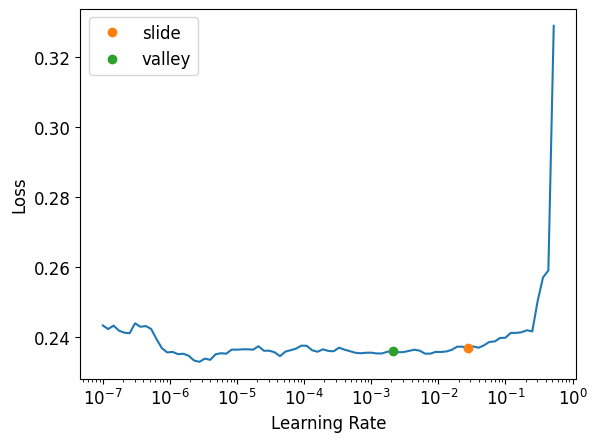

In [35]:
learn.lr_find(suggest_funcs=(slide,valley))

SuggestedLRs(valley=2.511886486900039e-05)

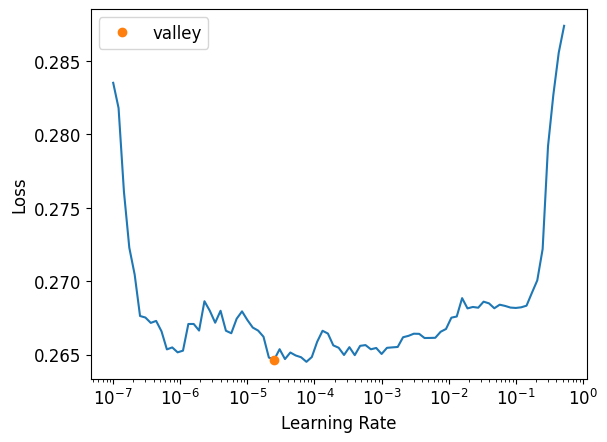

In [34]:
learn.lr_find()

In [35]:
%%time
learn.fit_one_cycle(10,1e-4)

epoch,train_loss,valid_loss,roc_auc_score,time
0,0.263791,0.263827,0.859386,01:53
1,0.262624,0.263845,0.859359,01:53
2,0.265786,0.263799,0.859438,01:52
3,0.264483,0.263806,0.859609,01:53
4,0.264135,0.263752,0.859599,01:53
5,0.265782,0.263736,0.859739,01:53
6,0.266668,0.263707,0.859734,01:52
7,0.265709,0.263611,0.859795,01:53
8,0.264767,0.263612,0.859839,01:53
9,0.262967,0.263598,0.859860,01:53


CPU times: user 18min 39s, sys: 9.11 s, total: 18min 48s
Wall time: 18min 51s


In [38]:
preds, _ = learn.get_preds(dl=learn.dls.test_dl(test_df))
final_preds = preds[:, 1]
final_preds

tensor([6.1688e-03, 5.6555e-01, 2.1447e-01,  ..., 9.1205e-04, 4.7635e-01, 3.1233e-04])

In [37]:
final_preds.shape,preds.shape

(torch.Size([7669866]), torch.Size([7669866, 2]))

In [40]:
preds,targets = learn.get_preds(dl=test_dl,with_decoded=True)

ValueError: too many values to unpack (expected 2)

In [39]:
nn_preds_proba = preds[:,1]
nn_preds_proba

tensor([6.1688e-03, 5.6555e-01, 2.1447e-01,  ..., 9.1205e-04, 4.7635e-01, 3.1233e-04])

In [41]:
dl = test_dl
nn_preds = learn.get_preds(dl=dl)
nn_preds_x = learn.get_preds()[0]
a_preds, _ = learn.get_preds(dl=dl)
nn_preds_y = a_preds.squeeze(1)
nn_preds_proba_b = (a_preds[:, 1])

In [42]:
nn_preds_testing = learn.get_preds()[0]

In [50]:
nn_preds_testing = learn.get_preds()[0]
nn_preds_testing = nn_preds_testing[:, 1]
nn_preds_testing.shape

torch.Size([2300959])

In [47]:
X_test.shape,nn_preds_proba.shape,nn_preds_proba_b.shape,nn_preds_testing.shape,nn_preds_x.shape,nn_preds_y.shape

((2300959, 10),
 torch.Size([7669866]),
 torch.Size([7669866]),
 torch.Size([2300959, 2]),
 torch.Size([2300959, 2]),
 torch.Size([7669866, 2]))

In [ ]:
test_dl = dls.test_dl(X_test)

In [51]:
nn_score = roc_auc_score(y_test,nn_preds_testing)
nn_score

0.8887732466948651

#### Ensemble

In [53]:
def ensemble():
    learn = tabular_learner(dls,emb_szs=emb_szs,layers=[200, 100],config=dict(ps=[0.3, 0.3],embed_p=0.3),metrics=RocAucBinary())
    with learn.no_bar(),learn.no_logging(): learn.fit(5, 1e-3)
    preds, _ = learn.get_preds(dl=learn.dls.test_dl(test_df))
    #preds_b, _ = learn.get_preds(dl=learn.dls.test_dl(test_df))
    return preds[:, 1],preds_b[:, 1]

In [ ]:
nn_preds_testing = learn.get_preds()[0]
nn_preds_testing = nn_preds_testing[:, 1]

In [54]:
%%time
learns = [ensemble() for _ in range(5)]

In [55]:
ens_preds = torch.stack(learns).mean(0)

In [56]:
ens_preds

tensor([3.8309e-03, 6.2528e-01, 2.4289e-01,  ..., 2.4612e-04, 5.9650e-01, 1.5149e-04])

In [59]:
ens_preds.shape,test_df.shape

(torch.Size([7669866]), (7669866, 10))

In [65]:
ens_preds_testing = learn.get_preds()[0]

In [67]:
ens_preds_testing = ens_preds_testing[:, 1]
ens_preds_testing.shape

torch.Size([2300959])

In [68]:
nn_preds_testing

tensor([0.0189, 0.0572, 0.0464,  ..., 0.0875, 0.3518, 0.4389])

In [69]:
ens_preds_testing

tensor([0.0189, 0.0572, 0.0464,  ..., 0.0875, 0.3518, 0.4389])

In [70]:
nn_score = roc_auc_score(y_test,ens_preds_testing)
nn_score

0.8887732466948651

In [62]:
y_test.shape

(2300959,)

In [60]:
test_df

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
id,,,,,,,,,,
11504798,Female,20,1,47.0,0,< 1 Year,No,2630.0,160.0,228
11504799,Male,47,1,28.0,0,1-2 Year,Yes,37483.0,124.0,123
11504800,Male,47,1,43.0,0,1-2 Year,Yes,2630.0,26.0,271
11504801,Female,22,1,47.0,1,< 1 Year,No,24502.0,152.0,115
11504802,Male,51,1,19.0,0,1-2 Year,No,34115.0,124.0,148
...,...,...,...,...,...,...,...,...,...,...
19174659,Male,57,1,28.0,0,1-2 Year,Yes,51661.0,124.0,109
19174660,Male,28,1,50.0,1,< 1 Year,No,25651.0,152.0,184
19174661,Male,47,1,33.0,1,1-2 Year,No,2630.0,138.0,63


In [63]:
learn

In [64]:
learns

[tensor([5.2234e-03, 5.7519e-01, 2.3516e-01,  ..., 3.7642e-04, 5.6876e-01, 2.0517e-04]),
 tensor([2.3106e-03, 6.1589e-01, 2.3097e-01,  ..., 1.9352e-04, 5.9109e-01, 2.0172e-04]),
 tensor([3.7830e-03, 5.9247e-01, 2.6526e-01,  ..., 3.0145e-04, 6.6120e-01, 8.4567e-05]),
 tensor([3.5276e-03, 6.6439e-01, 2.4047e-01,  ..., 1.2023e-04, 5.4274e-01, 1.4216e-04]),
 tensor([4.3101e-03, 6.7848e-01, 2.4260e-01,  ..., 2.3899e-04, 6.1870e-01, 1.2385e-04])]

In [71]:
learn.save('nn_model')  # Saves the model to a folder named 'my_model'


Path('models/nn_model.pth')

In [74]:
submit = pd.read_csv(path/'sample_submission.csv')
submit['Response'] = ens_preds
submit.to_csv('submission.csv', index=False)
sub = pd.read_csv('submission.csv')
sub

,id,Response
0,11504798,0.003831
1,11504799,0.625285
2,11504800,0.242891
3,11504801,0.000209
4,11504802,0.158190
...,...,...
7669861,19174659,0.199597
7669862,19174660,0.000595
7669863,19174661,0.000246
7669864,19174662,0.596499


In [72]:
learns.save('nn_model')  # Saves the model to a folder named 'my_model'


AttributeError: 'list' object has no attribute 'save'

In [58]:
nn_score = roc_auc_score(train_df,ens_preds)
nn_score

TypeError: '<' not supported between instances of 'int' and 'str'

In [ ]:
t

In [ ]:
test_df.shape

In [ ]:
preds, _ = learn.get_preds(dl=learn.dls.test_dl(test_df))
final_preds = preds[:, 1]

Default learner

In [43]:
learn = tabular_learner(dls, metrics=MatthewsCorrCoef())

SuggestedLRs(slide=0.019054606556892395, valley=0.001737800776027143)

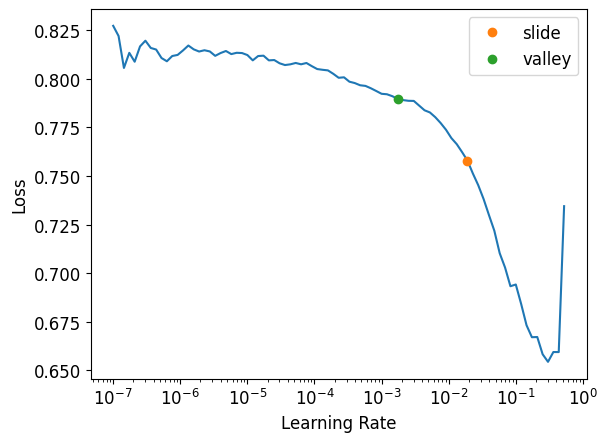

In [25]:
learn.lr_find(suggest_funcs=(slide,valley))

In [ ]:
%%time
learn.fit_one_cycle(8,0.005)


epoch,train_loss,valid_loss,roc_auc_score,time


In [ ]:
dl = test_dl
nn_preds = learn.get_preds(dl=dl)
nn_preds_x = learn.get_preds()[0]
a_preds, _ = learn.get_preds(dl=dl)
nn_preds_y = a_preds.squeeze(1)
nn_preds_proba = (a_preds[:, 1])

In [ ]:
preds,targets = learn.get_preds(dl=dl,with_decoded=True)

In [ ]:
nn_preds_proba = preds[:,1]
nn_

In [ ]:
submit = pd.read_csv(path/'sample_submission.csv')
submit['Response'] = nn_preds_proba
submit.to_csv('submission.csv', index=False)
sub = pd.read_csv('submission.csv')
sub

# Neural Network Ensemble

In [44]:
def ensemble():
    learn = tabular_learner(dls, metrics=MatthewsCorrCoef())
    with learn.no_bar(),learn.no_logging(): learn.fit(5, 0.005)
    return learn.get_preds(test_dl=test_dl)[0]

In [45]:
learns = [ensemble() for _ in range(5)]

TypeError: GatherPredsCallback.__init__() got an unexpected keyword argument 'test_dl'

In [ ]:
ens_preds = torch.stack(learns).mean(0)

# Random Forest

In [66]:
%%time
rf = RandomForestClassifier(100, min_samples_leaf=3)
rf_model = rf.fit(X_train, y_train);

#rf_preds = tensor(rf_model.predict(test_dl.xs))

rf_preds_x = tensor(rf_model.predict(X_test))

#mse = mean_absolute_error(y_test, rf_preds_x)
#rmse = np.sqrt(mse)

#accuracy_score(y_test,rf_preds_x)
rf_score = matthews_corrcoef(y_test,rf_preds_x)
rf_score

CPU times: user 6min 5s, sys: 1.02 s, total: 6min 6s
Wall time: 6min 6s


0.9838457005662817

In [67]:
rf_score

0.9838457005662817

In [ ]:
%%time
#After dropping Driving_License column
rf = RandomForestClassifier(100, min_samples_leaf=3)
rf_model = rf.fit(X_train, y_train);

rf_preds = tensor(rf_model.predict(test_dl.xs))
rf_preds_probs = tensor(rf_model.predict_proba(test_dl.xs))[:, 1]

rf_preds_x = tensor(rf_model.predict(X_test))
rf_preds_proba = tensor(rf_model.predict_proba(X_test))[:, 1]

#mse = mean_absolute_error(y_test, rf_preds_x)
#rmse = np.sqrt(mse)

#accuracy_score(y_test,rf_preds_x)
rf_score = roc_auc_score(y_test,rf_preds_proba)
rf_score

In [ ]:
%%time
#After dropping Driving_License,Gender column
rf = RandomForestClassifier(100, min_samples_leaf=3)
rf_model = rf.fit(X_train, y_train);

rf_preds = tensor(rf_model.predict(test_dl.xs))
rf_preds_probs = tensor(rf_model.predict_proba(test_dl.xs))[:, 1]

rf_preds_x = tensor(rf_model.predict(X_test))
rf_preds_proba = tensor(rf_model.predict_proba(X_test))[:, 1]

#mse = mean_absolute_error(y_test, rf_preds_x)
#rmse = np.sqrt(mse)

#accuracy_score(y_test,rf_preds_x)
rf_score = roc_auc_score(y_test,rf_preds_proba)
rf_score

In [ ]:
%%time
#After dropping Driving_License,Gender,Vehicle_Age column
rf = RandomForestClassifier(100, min_samples_leaf=3)
rf_model = rf.fit(X_train, y_train);

rf_preds = tensor(rf_model.predict(test_dl.xs))
rf_preds_probs = tensor(rf_model.predict_proba(test_dl.xs))[:, 1]

rf_preds_x = tensor(rf_model.predict(X_test))
rf_preds_proba = tensor(rf_model.predict_proba(X_test))[:, 1]

#mse = mean_absolute_error(y_test, rf_preds_x)
#rmse = np.sqrt(mse)

#accuracy_score(y_test,rf_preds_x)
rf_score = roc_auc_score(y_test,rf_preds_proba)
rf_score

In [ ]:
#RandomForestClassifier??

## Feature Importance

In [ ]:
def rf_feat_importance(m, train_subset):
    return pd.DataFrame({'cols':train_subset.columns, 'imp':m.feature_importances_}
                       ).sort_values('imp', ascending=False)

In [ ]:
fi = rf_feat_importance(rf_model, X_train)
#fi[:10]

fi

In [ ]:
def plot_fi(fi):
    return fi.plot('cols', 'imp', 'barh', figsize=(12,7), legend=False)

#plot_fi(fi[:30]);
plot_fi(fi);
     

#### Investigate effect of dropping columns

In [ ]:
# Dropping a single column
train_subset = train_subset.drop('Driving_License', axis=1)

# Dropping multiple columns
#train_subset_new = train_subset.drop(['Driving_License', 'Gender', 'Vehicle_Age'], axis=1)

In [ ]:
# Dropping a single column
train_subset = train_subset.drop('Gender', axis=1)


In [ ]:
# Dropping a single column
train_subset = train_subset.drop('Vehicle_Age', axis=1)


In [ ]:
train_subset.shape

In [ ]:
train_subset.columns

# Gradient Boosting

# XGBoost

In [33]:
print(xgb.get_config())

{'use_rmm': False, 'verbosity': 1}


In [18]:
xgb_optuna_params = {
              
    'num_leaves': 375, 
    'learning_rate': 0.0071851097672265855, 
    'n_estimators': 5000, 
    'subsample_for_bin': 104472,
    'min_child_samples': 454,
    'reg_alpha': 0.0011093389440775324,
    'reg_lambda': 0.15936937364526085,
    'colsample_bytree': 0.4533510196891779,
    'subsample': 0.9272807625455266,
    'max_depth': 20,
    'min_child_weight': 4,
    'gamma': 0.0033558210410357075,
    'max_leaves': 873,
    
    #'device': 'gpu'
}


In [19]:
%%time
xgb_model = xgb.XGBClassifier(**xgb_optuna_params)
xgb_model = xgb_model.fit(X_train, y_train)

xgb_preds = tensor(xgb_model.predict(test_dl.xs))

xgb_preds_x = tensor(xgb_model.predict(X_test))

xgb_score = matthews_corrcoef(y_test,xgb_preds_x)
xgb_score

CPU times: user 1h 19min 1s, sys: 2.41 s, total: 1h 19min 3s
Wall time: 39min 35s


0.9846618390002007

In [37]:
%%time
#from wandb.xgboost import wandb_callback
from wandb.integration.xgboost import WandbCallback
xgb_model = xgb.XGBClassifier(**xgb_optuna_params,  callbacks=[WandbCallback(log_model=True)])
xgb_model = xgb_model.fit(X_train, y_train)

xgb_preds = tensor(xgb_model.predict(test_dl.xs))

xgb_preds_x = tensor(xgb_model.predict(X_test))

xgb_score = matthews_corrcoef(y_test,xgb_preds_x)
xgb_score

CPU times: user 30min 27s, sys: 2.48 s, total: 30min 30s
Wall time: 15min 21s


0.9847493710839511

In [39]:
wandb.finish()

epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
epoch,1850


In [58]:
K_FOLDS = 5  
skf = StratifiedKFold(n_splits=K_FOLDS, shuffle=True, random_state=42)
fold_scores = []

for train_index, val_index in skf.split(X_train, y_train):
    X_fold_train, X_fold_val = X_train.iloc[train_index], X_train.iloc[val_index]
    y_fold_train, y_fold_val = y_train[train_index], y_train[val_index]
        
    # Train the model on the current fold
    xgb_model_fold = xgb.XGBClassifier(**xgb_optuna_params)
    xgb_model_fold.fit(X_fold_train, y_fold_train)
        
    # Predict on the validation set for the current fold
    y_pred_fold = xgb_model_fold.predict(X_fold_val)
    y_pred_fold_tt = xgb_model_fold.predict(test_dl.xs)
        
    # Calculate and store the Matthews Correlation Coefficient for the current fold
    score = matthews_corrcoef(y_fold_val, y_pred_fold)
    fold_scores.append(score)
        
    print(f"Fold {fold} MCC: {score}")
mean_score = np.mean(fold_scores)
print(f"Mean MCC: {mean_score}")
return mean_score

Fold 1 MCC: 0.9848091540913878
Fold 1 MCC: 0.9848999357187191
Fold 1 MCC: 0.9846937383081841
Fold 1 MCC: 0.9849847102888245
Fold 1 MCC: 0.9842854719902651
Mean MCC: 0.9847346020794762


SyntaxError: 'return' outside function (3101459010.py, line 23)

In [59]:
mean_score

0.9847346020794762

In [60]:
y_pred_fold_tt = xgb_model_fold.predict(test_dl.xs)

In [65]:
!rm submission.csv

rm: cannot remove 'submission.csv': No such file or directory


In [66]:
mapping = dict(enumerate(dls.vocab))
submit = pd.read_csv(path/'sample_submission.csv')
submit['class'] = [mapping[pred.item()] for pred in xgb_preds]
submit.to_csv('submission.csv', index=False)
sub = pd.read_csv('submission.csv')
print(sub)

              id class
0        3116945     e
1        3116946     p
2        3116947     p
3        3116948     p
4        3116949     e
...          ...   ...
2077959  5194904     p
2077960  5194905     p
2077961  5194906     p
2077962  5194907     e
2077963  5194908     e

[2077964 rows x 2 columns]


In [67]:
!kaggle competitions submit -c playground-series-s4e8 -f submission.csv -m "[XGBOOST] Silver Rubanza, Stratified CV XGBOOST with mapping optuna tuned params_xgb - lightning  "

100%|██████████████████████████████████████| 19.8M/19.8M [00:00<00:00, 46.0MB/s]
Successfully submitted to Binary Prediction of Poisonous Mushrooms

In [25]:
!rm submission.csv

rm: cannot remove 'submission.csv': No such file or directory


In [47]:
xgb_model.save_model('xgb_model.json')


In [63]:
import gc
gc.collect()

34010

In [27]:
!kaggle competitions submit -c playground-series-s4e8 -f submission.csv -m "[XGBOOST] Silver Rubanza, XGBOOST with mapping params_xgb "

100%|██████████████████████████████████████| 19.8M/19.8M [00:00<00:00, 53.3MB/s]
Successfully submitted to Binary Prediction of Poisonous Mushrooms

#### XgBoost feature importance

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

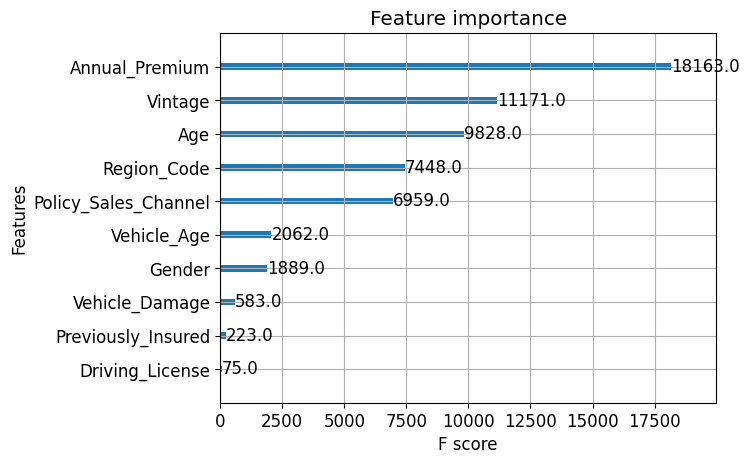

In [64]:
#plot_importance(xgb_model.fit(X_train, y_train))
plot_importance(xgb_model)

## Optuna

In [37]:
%%time

def objective(trial):
    params = {
        'num_leaves': trial.suggest_int('num_leaves', 100, 500),
        'learning_rate': trial.suggest_float('learning_rate', 0.001, 1.0, log=True),
        'n_estimators': trial.suggest_int('n_estimators', 300, 1200),
        'subsample_for_bin': trial.suggest_int('subsample_for_bin', 20000, 300000),
        'min_child_samples': trial.suggest_int('min_child_samples', 20, 500),
        'reg_alpha': trial.suggest_float('reg_alpha', 1e-9, 10.0, log=True),
        'reg_lambda': trial.suggest_float('reg_lambda', 1e-9, 10.0, log=True),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.4, 1.0),
        'subsample': trial.suggest_float('subsample', 0.25, 1.0),
        'max_depth': trial.suggest_int('max_depth', 1, 15),
        'device_type': 'gpu'
    }
    
    K_FOLDS = 5  # Number of folds for cross-validation
    kfold = KFold(n_splits=K_FOLDS, shuffle=True, random_state=42)

    fold_scores = []
    
    #for train_index, test_index in kfold.split(train_df):
    #print(f'train: {len(train_index)} samples, test: {len(test_index)} samples')

    for train_index, val_index in kfold.split(X_train):
        X_fold_train, X_fold_val = X_train.iloc[train_index], X_train.iloc[val_index]
        y_fold_train, y_fold_val = y_train[train_index], y_train[val_index]
        
        # Train the model on the current fold
        
        xgb_model_fold = xgb.XGBClassifier(**params_xgb)
        xgb_model_fold.fit(X_fold_train, y_fold_train)
        
        # Predict probabilities on the validation set for the current fold
        y_pred_fold = xgb_model_fold.predict(X_fold_val)
        y_pred_fold_tt = xgb_model_fold.predict(test_dl.xs)
        
        # Calculate and store the AUC-ROC score for the current fold
        score = matthews_corrcoef(y_fold_val, y_pred_fold)
        fold_scores.append(score)
        
        # Calculate the average score across all folds
        return np.mean(fold_scores)

# Create and run the study
study = optuna.create_study(sampler=TPESampler(n_startup_trials=30, multivariate=True, seed=0), direction="maximize")
study.optimize(objective, n_trials=100)

print('Best value:', study.best_value)
print('Best trial:', study.best_trial.params)

/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/optuna/samplers/_tpe/sampler.py:319: ExperimentalWarning: ``multivariate`` option is an experimental feature. The interface can change in the future.
  warnings.warn(
[I 2024-08-03 05:48:28,771] A new study created in memory with name: no-name-522c35b3-b4ca-4331-a2b1-d0a5a3591893
[I 2024-08-03 05:54:48,457] Trial 0 finished with value: 0.9830884260007531 and parameters: {'num_leaves': 320, 'learning_rate': 0.13981961408994045, 'n_estimators': 843, 'subsample_for_bin': 172567, 'min_child_samples': 223, 'reg_alpha': 0.0028770084050677926, 'reg_lambda': 2.3761404778025532e-05, 'colsample_bytree': 0.9350638004692479, 'subsample': 0.9727470703757719, 'max_depth': 6}. Best is trial 0 with value: 0.9830884260007531.
[I 2024-08-03 06:01:03,764] Trial 1 finished with value: 0.9830884260007531 and parameters: {'num_leaves': 417, 'learning_rate': 0.03860866271460544, 'n_estimators': 811, 'subsample_for_bin': 279167, 'min_child_sam

In [ ]:
#claude optimn with more params
import optuna
import xgboost as xgb
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import matthews_corrcoef
from optuna.samplers import TPESampler

def objective(trial):
    params = {
        'max_depth': trial.suggest_int('max_depth', 3, 25),
        'learning_rate': trial.suggest_float('learning_rate', 1e-3, 0.5, log=True),
        'n_estimators': trial.suggest_int('n_estimators', 50, 2000),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 20),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'gamma': trial.suggest_float('gamma', 1e-8, 1.0, log=True),
        'reg_alpha': trial.suggest_float('reg_alpha', 1e-8, 10.0, log=True),
        'reg_lambda': trial.suggest_float('reg_lambda', 1e-8, 10.0, log=True),
        'max_leaves': trial.suggest_int('max_leaves', 0, 1000),
        'max_bin': trial.suggest_int('max_bin', 200, 1000),
        'grow_policy': trial.suggest_categorical('grow_policy', ['depthwise', 'lossguide']),
        'booster': trial.suggest_categorical('booster', ['gbtree', 'dart']),
        'tree_method': trial.suggest_categorical('tree_method', ['exact', 'approx', 'hist']),
        'use_label_encoder': False,
        'eval_metric': 'logloss'
    }
    
    K_FOLDS = 5
    skf = StratifiedKFold(n_splits=K_FOLDS, shuffle=True, random_state=42)

    fold_scores = []

    for fold, (train_index, val_index) in enumerate(skf.split(X_train, y_train), 1):
        X_fold_train, X_fold_val = X_train.iloc[train_index], X_train.iloc[val_index]
        y_fold_train, y_fold_val = y_train.iloc[train_index], y_train.iloc[val_index]
        
        xgb_model_fold = xgb.XGBClassifier(**params)
        xgb_model_fold.fit(X_fold_train, y_fold_train)
        
        y_pred_fold = xgb_model_fold.predict(X_fold_val)
        
        score = matthews_corrcoef(y_fold_val, y_pred_fold)
        fold_scores.append(score)
        
        print(f"Fold {fold} MCC: {score}")

    mean_score = np.mean(fold_scores)
    print(f"Mean MCC: {mean_score}")
    return mean_score

study = optuna.create_study(sampler=TPESampler(n_startup_trials=30, multivariate=True, seed=0), direction="maximize")
study.optimize(objective, n_trials=100)

print('Best value:', study.best_value)
print('Best trial:', study.best_trial.params)

# Example of using the best parameters
best_params = study.best_trial.params
best_model = xgb.XGBClassifier(**best_params)
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
final_score = matthews_corrcoef(y_test, y_pred)
print(f"Final MCC on test set: {final_score}")

In [ ]:
print('Best value:', study.best_value)
print('Best trial:', study.best_trial.params)

### Cross validation implementation

In [54]:
%%time

K_FOLDS = 5  # Number of folds for cross-validation
kfold = KFold(n_splits=K_FOLDS, shuffle=True, random_state=42)

# This part is just to demonstrate how the indices work
for train_index, test_index in kfold.split(train_df):
    print(f'train: {len(train_index)} samples, test: {len(test_index)} samples')

fold_scores = []

for train_index, val_index in kfold.split(X_train):
    X_fold_train, X_fold_val = X_train.iloc[train_index], X_train.iloc[val_index]
    y_fold_train, y_fold_val = y_train[train_index], y_train[val_index]
    
    # Train the model on the current fold
    Xgb_model_fold = xgb.XGBClassifier(**params_xgb)
    Xgb_model_fold.fit(X_fold_train, y_fold_train)
    
    # Predict probabilities on the validation set for the current fold
    y_pred_fold = Xgb_model_fold.predict_proba(X_fold_val)
    y_pred_fold_tt = Xgb_model_fold.predict_proba(test_dl.xs)
    
    # Calculate and store the AUC-ROC score for the current fold
    score = matthews_corrcoef(y_fold_val, y_pred_fold)
    fold_scores.append(score)

# Calculate the average score across all folds
avg_score = np.mean(fold_scores)
print(f"Average AUC-ROC Score Across All Folds: {avg_score}")

train: 2493556 samples, test: 623389 samples
train: 2493556 samples, test: 623389 samples
train: 2493556 samples, test: 623389 samples
train: 2493556 samples, test: 623389 samples
train: 2493556 samples, test: 623389 samples
Average AUC-ROC Score Across All Folds: 0.996771942959711
CPU times: user 1h 4min 45s, sys: 3.56 s, total: 1h 4min 49s
Wall time: 32min 36s


In [55]:
y_pred_fold_tt.shape

(2077964,)

In [ ]:
submit = pd.read_csv(path/'sample_submission.csv')
submit['Response'] = y_pred_fold_tt
submit.to_csv('submission.csv', index=False)
sub = pd.read_csv('submission.csv')
sub

# LightGBM

In [ ]:
%pip install lightgbm --install-option=--gpu

In [36]:
params_lgb = {
    
    'verbose': -1,
    'objective': 'binary',
    #"eval_metric": 'auc',
    #'device': 'cpu',
    'n_estimators': 2350,           
    'learning_rate': 0.54,          
    'max_depth': 17,                
    'min_data_in_leaf': 20,        
    'reg_alpha': 6.0,              
    'reg_lambda': 1.5,              
    'max_bin': 54000,              
    'num_leaves': 60,             
    'min_data_in_bin': 2,              
    'colsample_bytree': 0.3,       
    'random_state': 0,
}

In [20]:
lgbm_rabbit_params = {'num_leaves': 227, 'learning_rate': 0.06737922153052582, 'n_estimators': 357, 'subsample_for_bin': 213892, 'min_child_samples': 292, 'reg_alpha': 4.5070762908503614e-07, 'reg_lambda': 0.00017079711660762664, 'colsample_bytree': 0.45636430645506504, 'subsample': 0.6819598716671345, 'max_depth': 14}

In [21]:
%%time
#ds subset
lgbm_model = lgb.LGBMClassifier(**lgbm_rabbit_params)
lgbm_model = lgbm_model.fit(X_train, y_train)

#test set preds
lgbm_preds = tensor(lgbm_model.predict(test_dl.xs))

#validation set preds
lgbm_preds_x = tensor(lgbm_model.predict(X_test))


#lgb_preds_x_prob = tensor(lgb_model.predict_proba(X_test))

lgbm_score = matthews_corrcoef(y_test,lgbm_preds_x)
lgbm_score


[LightGBM] [Info] Number of positive: 1364536, number of negative: 1129020
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.124631 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 976
[LightGBM] [Info] Number of data points in the train set: 2493556, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.547225 -> initscore=0.189464
[LightGBM] [Info] Start training from score 0.189464


CPU times: user 3min 29s, sys: 384 ms, total: 3min 29s
Wall time: 1min 45s


0.9844770580395102

In [19]:
lgbm_score

0.9834701867298028

In [7]:
from wandb.integration.lightgbm import wandb_callback, log_summary

In [41]:
# start logging a wandb run
wandb.init(project='s04e08_fastai_lgbm')

In [29]:
lgb_params = {
    'colsample_bytree': 0.5682206083486204,
    'learning_rate': 0.03663461240141722,
    'min_child_samples': 81,
    'min_child_weight': 0.02679654577764235,
    'n_estimators': 5000,
    'n_jobs': -1,
    'num_leaves': 528,
    #'random_state': SEED,
    'reg_alpha': 1.2839313094233695,
    'reg_lambda': 0.020852490623379794,
    'subsample': 0.5625905664875526,
    'verbose': -1
}


In [25]:
sujay_lgbm_params = {
    'n_estimators': 2600,
    'learning_rate': 0.051315430540711575,
    'num_leaves': 1220,
    'max_depth': 12,
    'min_data_in_leaf': 2500,
    'max_bin': 268,
    'lambda_l1': 10,
    'min_gain_to_split': 6.035984195766373,
    'bagging_fraction': 0.8
}

In [26]:
%%time
#ds subset
lgbm_model = lgb.LGBMClassifier(**sujay_lgbm_params, verbose=-1)
lgbm_model = lgbm_model.fit(X_train, y_train)

#test set preds
lgbm_preds = tensor(lgbm_model.predict(test_dl.xs))

#validation set preds
lgbm_preds_x = tensor(lgbm_model.predict(X_test))


#lgb_preds_x_prob = tensor(lgb_model.predict_proba(X_test))

lgbm_score = matthews_corrcoef(y_test,lgbm_preds_x)
lgbm_score


CPU times: user 5min 42s, sys: 330 ms, total: 5min 43s
Wall time: 2min 52s


0.9806498379791466

In [33]:
# Train the model with the callback
lgbm_model = lgb.LGBMClassifier(**lgb_params, callbacks=[wandb_callback])
lgbm_model = lgbm_model.fit(
    X_train, y_train,
    eval_set=[(X_train, y_train), (X_test, y_test)],
    eval_metric='logloss'
)

# Make predictions
lgbm_preds = tensor(lgbm_model.predict(test_dl.xs))
lgbm_preds_x = tensor(lgbm_model.predict(X_test))

# Calculate and log performance metric
lgbm_score = matthews_corrcoef(y_test, lgbm_preds_x)
wandb.log({"matthews_corrcoef": lgbm_score})


In [19]:
riza_lgbm_params = {
    'n_estimators': 10000,
    'learning_rate': 0.02,
    'max_depth': 10,
    'min_data_in_leaf': 85,
    'subsample': 0.6720606456166781,
    'max_bin': 240,
    'feature_fraction': 0.6946327643448142,

}

In [20]:
%%time
#ds subset
lgbm_model = lgb.LGBMClassifier(**riza_lgbm_params, verbose=-1)
lgbm_model = lgbm_model.fit(X_train, y_train)

#test set preds
lgbm_preds = tensor(lgbm_model.predict(test_dl.xs))

#validation set preds
lgbm_preds_x = tensor(lgbm_model.predict(X_test))


#lgb_preds_x_prob = tensor(lgb_model.predict_proba(X_test))

lgbm_score = matthews_corrcoef(y_test,lgbm_preds_x)
lgbm_score


In [27]:
log_summary(lgbm_model, save_model_checkpoint=True)

Error: Model should be an instance of lightgbm.basic.Booster

In [ ]:
lgbm_score,xgb_score

(0.9834701867298028, 0.9847493710839511)

In [46]:
import pickle

# Save the model
with open('lgbm_model.pkl', 'wb') as file:
    pickle.dump(lgbm_model, file)

# Load the model
with open('lgbm_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

In [28]:
lgbm_preds_x.shape, xgb_preds_x.shape

(torch.Size([623389]), torch.Size([623389]))

In [29]:
lgbm_score,xgb_score
lgbm_preds_x.shape, xgb_preds_x.shape
xgb_lgbm = (lgbm_preds_x + xgb_preds_x)/2
rounded_preds = torch.round(xgb_lgbm).long()
xgb_lgbm_score = matthews_corrcoef(y_test,rounded_preds)
xgb_lgbm_score

In [33]:
xgb_preds_x

tensor([0, 0, 0,  ..., 0, 1, 1])

In [30]:
xgb_lgbm

tensor([0., 0., 0.,  ..., 0., 1., 1.])

In [34]:
rounded_preds = torch.round(xgb_lgbm).long()

In [35]:
rounded_preds

tensor([0, 0, 0,  ..., 0, 1, 1])

In [36]:
xgb_lgbm_score = matthews_corrcoef(y_test,rounded_preds)
xgb_lgbm_score

0.984073487426332

In [83]:
lgbm_score_prob

0.8911916074717589

In [ ]:
%%time

K_FOLDS = 5  # Number of folds for cross-validation
kfold = KFold(n_splits=K_FOLDS, shuffle=True, random_state=42)

# This part is just to demonstrate how the indices work
for train_index, test_index in kfold.split(train_df):
    print(f'train: {len(train_index)} samples, test: {len(test_index)} samples')

fold_scores = []

for train_index, val_index in kfold.split(X_train):
    X_fold_train, X_fold_val = X_train.iloc[train_index], X_train.iloc[val_index]
    y_fold_train, y_fold_val = y_train[train_index], y_train[val_index]
    
    # Train the model on the current fold
    lgb_model_fold = lgb.LGBMClassifier(**params)
    lgb_model_fold.fit(X_fold_train, y_fold_train)
    
    # Predict probabilities on the validation set for the current fold
    y_pred_fold = lgb_model_fold.predict_proba(X_fold_val)
    y_pred_fold_tt = lgb_model_fold.predict_proba(test_dl.xs)
    
    # Calculate and store the AUC-ROC score for the current fold
    score = matthews_corrcoef(y_fold_val, y_pred_fold)
    fold_scores.append(score)

# Calculate the average score across all folds
avg_score = np.mean(fold_scores)
print(f"Average AUC-ROC Score Across All Folds: {avg_score}")

## Hyperparamter optimization with Optuna

In [ ]:
# finetuned optuna code
%%time

def objective(trial):
    params = {
        'num_leaves': trial.suggest_int('num_leaves', 100, 500),
        'learning_rate': trial.suggest_float('learning_rate', 0.001, 1.0, log=True),
        'n_estimators': trial.suggest_int('n_estimators', 300, 1200),
        'subsample_for_bin': trial.suggest_int('subsample_for_bin', 20000, 300000),
        'min_child_samples': trial.suggest_int('min_child_samples', 20, 500),
        'reg_alpha': trial.suggest_float('reg_alpha', 1e-9, 10.0, log=True),
        'reg_lambda': trial.suggest_float('reg_lambda', 1e-9, 10.0, log=True),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.4, 1.0),
        'subsample': trial.suggest_float('subsample', 0.25, 1.0),
        'max_depth': trial.suggest_int('max_depth', 1, 15),
        'device_type': 'gpu'
    }
    
    K_FOLDS = 5  # Number of folds for cross-validation
    kfold = KFold(n_splits=K_FOLDS, shuffle=True, random_state=42)

    fold_scores = []
    
    #for train_index, test_index in kfold.split(train_df):
    #print(f'train: {len(train_index)} samples, test: {len(test_index)} samples')

    for train_index, val_index in kfold.split(X_train):
        X_fold_train, X_fold_val = X_train.iloc[train_index], X_train.iloc[val_index]
        y_fold_train, y_fold_val = y_train[train_index], y_train[val_index]
        
        # Train the model on the current fold
        lgb_model_fold = lgb.LGBMClassifier(**params)  # Use params, not lgbm_params
        lgb_model_fold.fit(X_fold_train, y_fold_train)
        
        # Predict probabilities on the validation set for the current fold
        y_pred_fold = lgb_model_fold.predict_proba(X_fold_val)[:, 1]
        
        # Calculate and store the AUC-ROC score for the current fold
        score = roc_auc_score(y_fold_val, y_pred_fold)
        fold_scores.append(score)
    
    # Calculate the average score across all folds
    return np.mean(fold_scores)

# Create and run the study
study = optuna.create_study(sampler=TPESampler(n_startup_trials=30, multivariate=True, seed=0), direction="maximize")
study.optimize(objective, n_trials=100)

print('Best value:', study.best_value)
print('Best trial:', study.best_trial.params)

In [ ]:
print('Best value:', study.best_value)
print('Best trial:', study.best_trial.params)

In [ ]:
lgbm_optuna_run2_params  =  {
    'num_leaves': 320, 
    'learning_rate': 0.13981961408994045, 
    'n_estimators': 843,
    'subsample_for_bin': 172567, 
    'min_child_samples': 223,
    'reg_alpha': 0.0028770084050677926,
    'reg_lambda': 2.3761404778025532e-05,
    'colsample_bytree': 0.9350638004692479,
    'subsample': 0.9727470703757719,
    'max_depth': 6,
    'device_type':'gpu'
}

### With Optuna tuned parameters

In [ ]:
%%time
#ds subset
lgbm_model = lgb.LGBMClassifier(**lgbm_optuna_run2_params)
lgbm_model = lgbm_model.fit(X_train, y_train)

#test set preds
lgbm_preds = tensor(lgbm_model.predict(test_dl.xs))
lgbm_preds_prob = tensor(lgbm_model.predict_proba(test_dl.xs))
lgbm_positive_preds = (lgbm_preds_prob[:, 1])

#validation set preds
lgbm_preds_x = tensor(lgbm_model.predict(X_test))
lgbm_preds_x_prob = tensor(lgbm_model.predict_proba(X_test))
lgbm_positive_preds_x = (lgbm_preds_x_prob[:, 1])

lgbm_score = roc_auc_score(y_test,lgbm_positive_preds_x)
lgbm_score

#lgb_preds_x_prob = tensor(lgb_model.predict_proba(X_test))

lgbm_score_prob = roc_auc_score(y_test,lgbm_positive_preds_x)
lgbm_score_prob


In [ ]:
lgbm_score_prob


In [ ]:
%%time

K_FOLDS = 5  # Number of folds for cross-validation
kfold = KFold(n_splits=K_FOLDS, shuffle=True, random_state=42)

# This part is just to demonstrate how the indices work
for train_index, test_index in kfold.split(train_df):
    print(f'train: {len(train_index)} samples, test: {len(test_index)} samples')

fold_scores = []

for train_index, val_index in kfold.split(X_train):
    X_fold_train, X_fold_val = X_train.iloc[train_index], X_train.iloc[val_index]
    y_fold_train, y_fold_val = y_train[train_index], y_train[val_index]
    
    # Train the model on the current fold
    lgb_model_fold = lgb.LGBMClassifier(**lgbm_optuna_run2_params)
    lgb_model_fold.fit(X_fold_train, y_fold_train)
    
    # Predict probabilities on the validation set for the current fold
    y_pred_fold = lgb_model_fold.predict_proba(X_fold_val)[:, 1]
    y_pred_fold_tt = lgb_model_fold.predict_proba(test_dl.xs)[:, 1]
    
    # Calculate and store the AUC-ROC score for the current fold
    score = roc_auc_score(y_fold_val, y_pred_fold)
    fold_scores.append(score)

# Calculate the average score across all folds
avg_score = np.mean(fold_scores)
print(f"Average AUC-ROC Score Across All Folds: {avg_score}")

In [ ]:
avg_score

# CatBoost

In [38]:
cat_params = {
    #'eval_metric': 'AUC',
    'learning_rate': 0.005,
    'iterations': 10000,
    'depth': 9,
    'random_strength': 0,
    'l2_leaf_reg': 0.5,
    'max_leaves': 512,
    'fold_permutation_block': 64,
    #'task_type': 'GPU',
    #'devices': '0:1',
    'random_seed': 42,
    'verbose': False,
    'allow_writing_files': False
}

In [39]:
%%time
#using full ds
cat_model = CatBoostClassifier(**cat_params)
cat_model = cat_model.fit(X_train, y_train, eval_set=(X_test, y_test), verbose=False)

#test set preds
cat_preds = tensor(cat_model.predict(test_dl.xs))
#cat_preds_final = cat_preds.squeeze(1)

#validation set preds
cat_preds_x = tensor(cat_model.predict(X_test))

#cat_preds_x_final = cat_preds_x.squeeze(1)

#accuracy_score(y_test,cat_preds_x)

cat_score = matthews_corrcoef(y_test,cat_preds_x)
cat_score

CPU times: user 2h 26min 58s, sys: 1min 40s, total: 2h 28min 38s
Wall time: 42min 32s


0.9836942254496845

0.9836942254496845

In [40]:
cat_score

0.9836942254496845

In [22]:
cat_score

0.8823750590995983

In [ ]:
%%time
#using full ds
cat_model = CatBoostClassifier(**cat_params)
cat_model = cat_model.fit(X_train, y_train, eval_set=(X_test, y_test), verbose=False)

#test set preds
cat_preds = tensor(cat_model.predict(test_dl.xs))
cat_preds_probs = tensor(cat_model.predict_proba(test_dl.xs))[:, 1]
#cat_preds_final = cat_preds.squeeze(1)

#validation set preds
cat_preds_x = tensor(cat_model.predict(X_test))
cat_preds_x_proba = tensor(cat_model.predict_proba(X_test))[:, 1]

#cat_preds_x_final = cat_preds_x.squeeze(1)

#accuracy_score(y_test,cat_preds_x)

cat_score = roc_auc_score(y_test,cat_preds_x_proba)
cat_score

Optuna optimization

In [ ]:
%%time
#will you graduate notebook
def objective(trial):
    param = {
        'iterations': trial.suggest_int('iterations', 100, 6000),
        'depth': trial.suggest_int('depth', 4, 15),
        'learning_rate': trial.suggest_float('learning_rate', 1e-3, 1e-1, log=True),
        'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 1e-2, 10, log=True),
        'border_count': trial.suggest_int('border_count', 32, 255),
        'random_strength': trial.suggest_float('random_strength', 1e-2, 10, log=True),
        'bagging_temperature': trial.suggest_float('bagging_temperature', 0.01, 100.00, log=True),
        'od_type': 'Iter',
        'od_wait': trial.suggest_int('od_wait', 10, 50),
        'task_type': 'GPU',  # Set task type to GPU
        'devices': '0:1',    # Use both GPUs
        'eval_metric': 'AUC',
        'loss_function': 'Logloss',
        'class_names': [0, 1],
        #'max_leaves': trial.suggest_int('max_leaves', 300, 1000), 
        
    }

    cat_model = CatBoostClassifier(**param, verbose=0)
    cat_model.fit(X_train, y_train, eval_set=(X_test, y_test), early_stopping_rounds=50, verbose=0)

    cat_preds = cat_model.predict(X_test)
    cat_score = matthews_corrcoef(y_test,cat_preds)
    return cat_score

# UNCOMMENT THE FOLLOWING LINES TO RUN OPTUNA, I COMMENTED THEM OUT TO SAVE SOME TIME WHILE PUBLISHING
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100, show_progress_bar=True)

In [ ]:
print('Best value:', study.best_value)
print('Best trial:', study.best_trial.params)

[I 2024-07-28 13:10:00,811] Trial 35 finished with value: 0.8806571694660618 and parameters: {'iterations': 3922, 'depth': 7, 'learning_rate': 0.06785132188911386, 'l2_leaf_reg': 0.010246847658225403, 'border_count': 255, 'random_strength': 8.699168928480285, 'bagging_temperature': 0.07986828861909359, 'od_wait': 36}. Best is trial 35 with value: 0.8806571694660618.

[I 2024-07-28 14:53:15,848] Trial 59 finished with value: 0.880659558073007 and parameters: {'iterations': 4770, 'depth': 9, 'learning_rate': 0.0751956964415004, 'l2_leaf_reg': 0.18411119632584752, 'border_count': 248, 'random_strength': 0.1621690161205084, 'bagging_temperature': 0.3374322444670465, 'od_wait': 38}. Best is trial 59 with value: 0.880659558073007.

[I 2024-07-28 15:05:48,337] Trial 61 finished with value: 0.880751074531679 and parameters: {'iterations': 4801, 'depth': 9, 'learning_rate': 0.07092162741545756, 'l2_leaf_reg': 0.14524960916052582, 'border_count': 249, 'random_strength': 0.16969220470731253, 'bagging_temperature': 0.05031377942990587, 'od_wait': 43}. Best is trial 61 with value: 0.880751074531679.

In [18]:
#params from https://www.kaggle.com/code/tilii7/tuned-catboost-10fold
tilli_cat_params = {
    'task_type': 'GPU',
    'loss_function': 'Logloss',
    'eval_metric': 'AUC',
    'bootstrap_type': 'Bayesian',
    'grow_policy': 'Lossguide',
    'iterations': 10000,
    'learning_rate': 0.05,
    'thread_count': 4,
    'verbose': 500,
    'num_leaves': 267,
    'bagging_temperature': 0.22080996289544302,
    'depth': 7,
    'border_count': 994,
    'min_child_samples': 93,
    'random_strength': 0.7218648648351215,
    'l2_leaf_reg': 80.74974748224912,
    'model_size_reg': 0.5426723735193903,
    'random_seed': 1001,
}

In [19]:
%%time
#using full ds
cat_model = CatBoostClassifier(**tilli_cat_params)
cat_model = cat_model.fit(X_train, y_train, eval_set=(X_test, y_test), verbose=False)

#test set preds
cat_preds = tensor(cat_model.predict(test_dl.xs))
cat_preds_probs = tensor(cat_model.predict_proba(test_dl.xs))[:, 1]
#cat_preds_final = cat_preds.squeeze(1)

#validation set preds
cat_preds_x = tensor(cat_model.predict(X_test))
cat_preds_x_proba = tensor(cat_model.predict_proba(X_test))[:, 1]

#cat_preds_x_final = cat_preds_x.squeeze(1)

#accuracy_score(y_test,cat_preds_x)

cat_score = roc_auc_score(y_test,cat_preds_x_proba)
cat_score

Default metric period is 5 because AUC is/are not implemented for GPU


CPU times: user 1h 36min 26s, sys: 15min 12s, total: 1h 51min 38s
Wall time: 37min


0.8841238523396079

In [20]:
cat_score

0.8841238523396079

In [22]:
%%time
#using full ds
cat_model = CatBoostClassifier(random_state=512,
    objective="Logloss",  # Equivalent to "binary:logistic" in XGBoost
    eval_metric='AUC',  # Equivalent to 'auc' in XGBoost
    depth=8,  # Equivalent to max_depth
    min_data_in_leaf=13,  # Equivalent to min_child_weight
    learning_rate=0.2973547288176656,  # Equivalent to learning_rate
    n_estimators=914,  # Number of boosting rounds
    l2_leaf_reg=4.5257568564763595,  # Equivalent to reg_lambda
    bagging_temperature=0.0022240625943131627,  # Controls the amount of randomization in CatBoost (similar to colsample_bytree)
    early_stopping_rounds=10,  # Similar to early_stopping_rounds in XGBoost
    #scale_pos_weight = ratio,
    silent=True
)
cat_model = cat_model.fit(X_train, y_train, eval_set=(X_test, y_test), verbose=False)

#test set preds
cat_preds = tensor(cat_model.predict(test_dl.xs))
cat_preds_probs = tensor(cat_model.predict_proba(test_dl.xs))[:, 1]
#cat_preds_final = cat_preds.squeeze(1)

#validation set preds
cat_preds_x = tensor(cat_model.predict(X_test))
cat_preds_x_proba = tensor(cat_model.predict_proba(X_test))[:, 1]

#cat_preds_x_final = cat_preds_x.squeeze(1)

#accuracy_score(y_test,cat_preds_x)

cat_score = roc_auc_score(y_test,cat_preds_x_proba)
cat_score

CPU times: user 57min 48s, sys: 1min 9s, total: 58min 57s
Wall time: 19min 37s


0.880509951829847

In [23]:
cat_score

0.880509951829847

# Model Predictions

In [ ]:
model_preds = {
    "random forests":roc_auc_score(y_test,rf_preds_x),
    "cat boost":cat_score,
    "lgbm":lgb_score,
    "xgboost":roc_auc_score(y_test,xgb_preds_x),   
}

#model_preds_a = model_preds.sort()
print(model_preds)

In [ ]:
cat_preds_x

# Model Ensemble

#### For Scoring

In [82]:
lgbm_preds_x.shape, xgb_preds_x.shape

(torch.Size([7669866]), torch.Size([7669866]))

In [22]:
lgbm_score,xgb_score,xgb_lgbm_score

(0.9834701867298028, 0.9847493710839511, 0.9836942254496845)

In [22]:
xgb_lgbm = (lgbm_preds_x + xgb_preds_x)/2
xgb_lgbm

tensor([0., 0., 0.,  ..., 0., 1., 1.])

In [23]:
rounded_xgb_lgbm_preds = torch.round(xgb_lgbm).long()
xgb_lgbm_score = matthews_corrcoef(y_test,rounded_xgb_lgbm_preds)
xgb_lgbm_score

0.984568351254533

In [38]:
lgbm_score,xgb_score,xgb_lgbm_score,xgb_lgbm_nn_score

(0.9844770580395102, 0.9846618390002007, 0.984568351254533, 0.9847168111645407)

In [42]:
#rabbit_lgbm,xgb,lgbm+xgb scores
mcc = pd.DataFrame({
    'algoritm': ['lgbm', 'xgboost',  'xgboost + lgbm ','xgb+nn+lgbm','xgb+nn','lgbm+nn' ],
    'mcc': [lgbm_score, xgb_score, xgb_lgbm_score,xgb_lgbm_nn_score,xgb_nn_a_score,lgbm_nn_score]
})

mcc_sorted = mcc.sort_values(by='mcc', ascending=False)
mcc_sorted

,algoritm,mcc
3,xgb+nn+lgbm,0.984717
1,xgboost,0.984662
2,xgboost + lgbm,0.984568
0,lgbm,0.984477
4,xgb+nn,0.984323
5,lgbm+nn,0.984268


In [ ]:
#rabbit_lgbm,xgb,lgbm+xgb scores
acc = pd.DataFrame({
    'algoritm': ['lgbm', 'xgboost', 'cat_boost', 'xgboost + lgbm ', 'xgboost + lgbm + cat_boost',
     'xgboost + cat_boost', 'lgbm + cat_boost','neural_network','xgb + nn',
     'nn_score + lgbm + xgb + cat','nn_score + lgbm + cat','nn_score + xgb + cat' ],
    'acc': [lgbm_score, xgb_score, cat_score,xgb_lgbm_score,xgb_lgbm_cat_score,
    xgb_cat_score,lgbm_cat_score, nn_score,xgb_nn_a_score,xgb_lgbm_cat_nn_score, lgbm_cat_nn_score,xgb_cat_nn_score ]
})

accuracy_sorted = acc.sort_values(by='acc', ascending=False)
accuracy_sorted

In [43]:
xgb_lgbm_cat = (lgbm_preds_x + xgb_preds_x + cat_preds_x)/3
xgb_lgbm_cat

tensor([0., 0., 0.,  ..., 0., 1., 1.])

In [44]:
rounded_xgb_lgbm_cat_preds = torch.round(xgb_lgbm_cat).long()
xgb_lgbm_cat_score = matthews_corrcoef(y_test,rounded_xgb_lgbm_cat_preds)
xgb_lgbm_cat_score

0.9845292315722417

In [45]:
xgb_cat = ( xgb_preds_x + cat_preds_x)/2
xgb_cat

tensor([0., 0., 0.,  ..., 0., 1., 1.])

In [46]:
rounded_xgb_cat_preds = torch.round(xgb_cat).long()
xgb_cat_score = matthews_corrcoef(y_test,rounded_xgb_cat_preds)
xgb_cat_score

0.9841951678553543

In [47]:
lgbm_cat = ( lgbm_preds_x + cat_preds_x)/2
lgbm_cat

tensor([0., 0., 0.,  ..., 0., 1., 1.])

In [48]:
rounded_lgbm_cat_preds = torch.round(lgbm_cat).long()
lgbm_cat_score = matthews_corrcoef(y_test,rounded_lgbm_cat_preds)
lgbm_cat_score

0.983536228045564

In [31]:
final_preds.shape,xgb_preds_x.shape,final_preds_scoring.shape,rounded_nn_scoring_preds.shape

(torch.Size([2077964]),
 torch.Size([623389]),
 torch.Size([623389]),
 torch.Size([623389]))

In [25]:
#xgb_nn = (final_preds_scoring + xgb_preds_x)/2


tensor([8.9913e-03, 8.0369e-04, 1.0292e-03,  ..., 4.7118e-04, 9.9772e-01, 9.9454e-01])

In [33]:
xgb_nn_a = (rounded_nn_scoring_preds + xgb_preds_x)/2
xgb_nn_a


tensor([0., 0., 0.,  ..., 0., 1., 1.])

In [34]:
rounded_xgb_nn_a_preds = torch.round(xgb_nn_a).long()
xgb_nn_a_score = matthews_corrcoef(y_test,rounded_xgb_nn_a_preds)
xgb_nn_a_score

0.9843226326298561

In [28]:
xgb_preds_x

tensor([0, 0, 0,  ..., 0, 1, 1])

In [30]:
final_preds_scoring

tensor([1.7983e-02, 1.6074e-03, 2.0584e-03,  ..., 9.4235e-04, 9.9545e-01, 9.8908e-01])

In [32]:
rounded_nn_scoring_preds

tensor([0, 0, 0,  ..., 0, 1, 1])

In [26]:
rounded_xgb_nn_preds = torch.round(xgb_nn).long()
xgb_nn_score = matthews_corrcoef(y_test,rounded_xgb_nn_preds)
xgb_nn_score

0.9847493710839511

In [35]:
xgb_nn_score,xgb_score,nn_score,xgb_nn_a_score

(0.9847493710839511,
 0.9847493710839511,
 0.9838031638173518,
 0.9841375306354742)

In [35]:
lgbm_nn = (rounded_nn_scoring_preds + lgbm_preds_x)/2
rounded_lgbm_nn_preds = torch.round(lgbm_nn).long()
lgbm_nn_score = matthews_corrcoef(y_test,rounded_lgbm_nn_preds)
lgbm_nn_score

0.984267682885733

In [50]:
cat_nn = (rounded_nn_scoring_preds+ cat_preds_x)/2
rounded_cat_nn_preds = torch.round(cat_nn).long()
cat_nn_score = matthews_corrcoef(y_test,rounded_cat_nn_preds)
cat_nn_score

0.983702785641168

In [51]:
xgb_lgbm_cat_nn = (rounded_nn_scoring_preds+ cat_preds_x + lgbm_preds_x + xgb_preds_x  )/4
rounded_xgb_lgbm_cat_nn_preds = torch.round(xgb_lgbm_cat_nn).long()
xgb_lgbm_cat_nn_score = matthews_corrcoef(y_test,rounded_xgb_lgbm_cat_nn_preds)
xgb_lgbm_cat_nn_score

0.9844976922630843

In [52]:
lgbm_cat_nn = (rounded_nn_scoring_preds+ cat_preds_x + lgbm_preds_x  )/3
rounded_lgbm_cat_nn_preds = torch.round(lgbm_cat_nn).long()
lgbm_cat_nn_score = matthews_corrcoef(y_test,rounded_lgbm_cat_nn_preds)
lgbm_cat_nn_score

0.9843389503172112

In [36]:
xgb_lgbm_nn = (rounded_nn_scoring_preds + lgbm_preds_x + xgb_preds_x  )/3
rounded_xgb_lgbm_nn_preds = torch.round(xgb_lgbm_nn).long()
xgb_lgbm_nn_score = matthews_corrcoef(y_test,rounded_xgb_lgbm_nn_preds)
xgb_lgbm_nn_score

0.9847168111645407

In [ ]:
final_preds

In [31]:
model_preds = {
    #"random forests":roc_auc_score(y_test,rf_preds_x),
    "cat boost":cat_score,
    "lgbm":lgbm_score,
    "xgboost":xgb_score,
    "xgboost + lgbm":xgb_lgbm_score,
    "xgboost + lgbm + cat":xgb_lgbm_cat_score,
    "xgboost + cat":xgb_cat_score,
    "lgbm + cat":lgbm_cat_score,

}

#model_preds_a = model_preds.sort()
print(model_preds)

{'cat boost': 0.9836942254496845, 'lgbm': 0.9834701867298028, 'xgboost': 0.9847493710839511, 'xgboost + lgbm': 0.984073487426332, 'xgboost + lgbm + cat': 0.9845292315722417, 'xgboost + cat': 0.9841951678553543, 'lgbm + cat': 0.983536228045564}


In [55]:
acc = pd.DataFrame({
    'algoritm': ['lgbm', 'xgboost', 'cat_boost', 'xgboost + lgbm ', 'xgboost + lgbm + cat_boost',
     'xgboost + cat_boost', 'lgbm + cat_boost','neural_network','xgb + nn',
     'nn_score + lgbm + xgb + cat','nn_score + lgbm + cat','nn_score + xgb + cat' ],
    'acc': [lgbm_score, xgb_score, cat_score,xgb_lgbm_score,xgb_lgbm_cat_score,
    xgb_cat_score,lgbm_cat_score, nn_score,xgb_nn_a_score,xgb_lgbm_cat_nn_score, lgbm_cat_nn_score,xgb_cat_nn_score ]
})

accuracy_sorted = acc.sort_values(by='acc', ascending=False)
accuracy_sorted

,algoritm,acc
1,xgboost,0.984749
11,nn_score + xgb + cat,0.984536
4,xgboost + lgbm + cat_boost,0.984529
9,nn_score + lgbm + xgb + cat,0.984498
10,nn_score + lgbm + cat,0.984339
5,xgboost + cat_boost,0.984195
8,xgb + nn,0.984138
3,xgboost + lgbm,0.984073
7,neural_network,0.983803
2,cat_boost,0.983694


#### For Submission

In [56]:
lgbm_preds.shape, xgb_preds.shape,final_preds.shape

(torch.Size([2077964]), torch.Size([2077964]), torch.Size([2077964]))

In [62]:
xgb_cat_nn_sub = (cat_preds + xgb_preds + final_preds)/3
xgb_cat_nn_sub

tensor([5.6071e-04, 9.9958e-01, 9.9620e-01,  ..., 9.9815e-01, 2.0775e-03, 5.9104e-04])

In [ ]:
xgb_lgbm_sub = (lgbm_preds + xgb_preds)/2
xgb_lgbm_sub

In [42]:
rounded_xgb_lgbm_sub_preds = torch.round(xgb_lgbm_sub).long()
rounded_xgb_lgbm_sub_preds

tensor([0, 1, 1,  ..., 1, 0, 0])

In [63]:
rounded_xgb_cat_nn_sub_preds = torch.round(xgb_cat_nn_sub).long()
rounded_xgb_cat_nn_sub_preds

tensor([0, 1, 1,  ..., 1, 0, 0])

In [ ]:
xgb_lgbm_nn_sub

# Submission

In [64]:
!rm submission.csv
!ls

AutogluonModels  playground-series-s4e8		     wandb
lgbm_model.pkl	 playground-series-s4e8.zip	     xgb_model.json
main.py		 poisonous_mushrooms_classification
models		 requirements.txt


In [60]:
mapping = dict(enumerate(dls.vocab))
submit = pd.read_csv(path/'sample_submission.csv')
submit['class'] = [mapping[pred.item()] for pred in rounded_xgb_lgbm_nn_sub_preds]
submit.to_csv('submission.csv', index=False)
sub = pd.read_csv('submission.csv')
print(sub)

              id class
0        3116945     e
1        3116946     p
2        3116947     p
3        3116948     p
4        3116949     e
...          ...   ...
2077959  5194904     p
2077960  5194905     p
2077961  5194906     p
2077962  5194907     e
2077963  5194908     e

[2077964 rows x 2 columns]


In [61]:
!kaggle competitions submit -c playground-series-s4e8 -f submission.csv -m "[XGBOOST+CAT+NN] Silver Rubanza, XGBOOST+CAT+NN average with mapping optuna tuned params_xgb - lightning  "

100%|██████████████████████████████████████| 19.8M/19.8M [00:00<00:00, 48.4MB/s]
Successfully submitted to Binary Prediction of Poisonous Mushrooms

In [46]:
!rm submission.csv
!ls

AutogluonModels		playground-series-s4e8.zip	    xgb_model.json
main.py			poisonous_mushrooms_classification
playground-series-s4e8	requirements.txt


# OpenFE

In [70]:
ofe = OpenFE()

In [71]:
#set n_jobs to be the actual cpu core count
CPU_COUNT = os.cpu_count()
n_jobs = CPU_COUNT
n_jobs


4

In [72]:
train_subset.shape

(1000000, 11)

In [73]:
train_subset.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
id,,,,,,,,,,,
2904941,Male,25,1,9.0,0,< 1 Year,Yes,33990.0,152.0,166,0
7879547,Female,21,1,28.0,1,< 1 Year,No,49514.0,152.0,84,0
1554558,Female,31,1,15.0,0,< 1 Year,No,36913.0,152.0,149,0
5792501,Male,25,1,10.0,1,< 1 Year,No,36274.0,152.0,256,0
7511622,Male,66,1,28.0,1,1-2 Year,Yes,44214.0,26.0,223,0


In [ ]:
%%time
features = ofe.fit(data=train_subset.drop('Response', axis=1), label=train_subset['Response'], feature_boosting=True, n_jobs=n_jobs)

In [75]:
train_x, test_x = transform(train_subset.drop('Response', axis=1), test_subset, features, n_jobs=n_jobs)

In [ ]:
#train_x, test_x = transform(train_df.drop('Response', axis=1), test_df, features, n_jobs=4)

In [76]:
train_x.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,autoFE_f_0,autoFE_f_1,autoFE_f_2,autoFE_f_3,autoFE_f_4,autoFE_f_5,autoFE_f_6,autoFE_f_7,autoFE_f_8,autoFE_f_9,autoFE_f_10,autoFE_f_11,autoFE_f_12,autoFE_f_13,autoFE_f_14,autoFE_f_15,autoFE_f_16,autoFE_f_17,autoFE_f_18,autoFE_f_19,autoFE_f_20,autoFE_f_21,autoFE_f_22,autoFE_f_23,autoFE_f_24,autoFE_f_25,autoFE_f_26,autoFE_f_27,autoFE_f_28,autoFE_f_29,autoFE_f_30,autoFE_f_31,autoFE_f_32,autoFE_f_33,autoFE_f_34,autoFE_f_35,autoFE_f_36,autoFE_f_37,autoFE_f_38,autoFE_f_39,autoFE_f_40,autoFE_f_41,autoFE_f_42,autoFE_f_43,autoFE_f_44,autoFE_f_45,autoFE_f_46,autoFE_f_47,autoFE_f_48,autoFE_f_49,autoFE_f_50,autoFE_f_51,autoFE_f_52,autoFE_f_53,autoFE_f_54,autoFE_f_55,autoFE_f_56,autoFE_f_57,autoFE_f_58,autoFE_f_59,autoFE_f_60,autoFE_f_61,autoFE_f_62,autoFE_f_63,autoFE_f_64,autoFE_f_65,autoFE_f_66,autoFE_f_67,autoFE_f_68,autoFE_f_69,autoFE_f_70,autoFE_f_71,autoFE_f_72,autoFE_f_73,autoFE_f_74,autoFE_f_75,autoFE_f_76,autoFE_f_77,autoFE_f_78,autoFE_f_79,autoFE_f_80,autoFE_f_81,autoFE_f_82,autoFE_f_83,autoFE_f_84,autoFE_f_85,autoFE_f_86,autoFE_f_87,autoFE_f_88,autoFE_f_89,autoFE_f_90,autoFE_f_91,autoFE_f_92,autoFE_f_93,autoFE_f_94,autoFE_f_95,autoFE_f_96,autoFE_f_97,autoFE_f_98,autoFE_f_99,autoFE_f_100,autoFE_f_101,autoFE_f_102,autoFE_f_103,autoFE_f_104,autoFE_f_105,autoFE_f_106,autoFE_f_107,autoFE_f_108,autoFE_f_109,autoFE_f_110,autoFE_f_111,autoFE_f_112,autoFE_f_113,autoFE_f_114,autoFE_f_115,autoFE_f_116,autoFE_f_117,autoFE_f_118,autoFE_f_119,autoFE_f_120,autoFE_f_121,autoFE_f_122,autoFE_f_123,autoFE_f_124,autoFE_f_125,autoFE_f_126,autoFE_f_127,autoFE_f_128,autoFE_f_129,autoFE_f_130,autoFE_f_131,autoFE_f_132,autoFE_f_133,autoFE_f_134,autoFE_f_135,autoFE_f_136,autoFE_f_137,autoFE_f_138,autoFE_f_139,autoFE_f_140,autoFE_f_141,autoFE_f_142,autoFE_f_143,autoFE_f_144,autoFE_f_145,autoFE_f_146,autoFE_f_147,autoFE_f_148,autoFE_f_149,autoFE_f_150,autoFE_f_151,autoFE_f_152,autoFE_f_153,autoFE_f_154,autoFE_f_155,autoFE_f_156,autoFE_f_157,autoFE_f_158,autoFE_f_159,autoFE_f_160,autoFE_f_161,autoFE_f_162,autoFE_f_163,autoFE_f_164,autoFE_f_165,autoFE_f_166,autoFE_f_167,autoFE_f_168,autoFE_f_169,autoFE_f_170,autoFE_f_171,autoFE_f_172,autoFE_f_173,autoFE_f_174,autoFE_f_175,autoFE_f_176,autoFE_f_177,autoFE_f_178,autoFE_f_179,autoFE_f_180,autoFE_f_181,autoFE_f_182,autoFE_f_183,autoFE_f_184,autoFE_f_185,autoFE_f_186,autoFE_f_187,autoFE_f_188,autoFE_f_189,autoFE_f_190,autoFE_f_191,autoFE_f_192,autoFE_f_193,autoFE_f_194,autoFE_f_195,autoFE_f_196,autoFE_f_197,autoFE_f_198,autoFE_f_199,autoFE_f_200,autoFE_f_201,autoFE_f_202,autoFE_f_203,autoFE_f_204,autoFE_f_205,autoFE_f_206,autoFE_f_207,autoFE_f_208,autoFE_f_209,autoFE_f_210,autoFE_f_211,autoFE_f_212,autoFE_f_213,autoFE_f_214,autoFE_f_215,autoFE_f_216,autoFE_f_217,autoFE_f_218,autoFE_f_219,autoFE_f_220,autoFE_f_221,autoFE_f_222,autoFE_f_223,autoFE_f_224,autoFE_f_225,autoFE_f_226,autoFE_f_227,autoFE_f_228,autoFE_f_229,autoFE_f_230,autoFE_f_231,autoFE_f_232,autoFE_f_233,autoFE_f_234,autoFE_f_235,autoFE_f_236,autoFE_f_237,autoFE_f_238,autoFE_f_239,autoFE_f_240
openfe_index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2904941,Male,25,1,9.0,0,< 1 Year,Yes,33990.0,152.0,166,5642340.0,0.480421,186.0,5109.0,542950.0,0.178632,166.0,305910.0,0.0,166.0,166.0,0.653033,NaN,0.380000,14.485116,0.529460,0.510935,0.280615,33990.0,191.0,6910.0,0.573447,34156.0,0.537776,33990.0,34015.0,1359.600000,0.509686,0.500451,0.487574,0.0,34.986475,0.589180,223.618421,0.499175,17590.0,6078.0,28.0,78.856796,175.0,895.0,14079.233812,0.643177,6846.0,16.888889,0.625551,0.162050,0.0,26902.168033,30648.0,0.0,0.554006,125.991393,33965.0,0.0,0.225569,0.499973,166.0,5166480.0,NaN,0.0,0.505359,79.646454,127.0,0.0,6.640000,165

In [77]:
train_x.shape

(1000000, 251)

In [78]:
train_x.reset_index(drop=True, inplace=True)

In [79]:
train_x

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,autoFE_f_0,autoFE_f_1,autoFE_f_2,autoFE_f_3,autoFE_f_4,autoFE_f_5,autoFE_f_6,autoFE_f_7,autoFE_f_8,autoFE_f_9,autoFE_f_10,autoFE_f_11,autoFE_f_12,autoFE_f_13,autoFE_f_14,autoFE_f_15,autoFE_f_16,autoFE_f_17,autoFE_f_18,autoFE_f_19,autoFE_f_20,autoFE_f_21,autoFE_f_22,autoFE_f_23,autoFE_f_24,autoFE_f_25,autoFE_f_26,autoFE_f_27,autoFE_f_28,autoFE_f_29,autoFE_f_30,autoFE_f_31,autoFE_f_32,autoFE_f_33,autoFE_f_34,autoFE_f_35,autoFE_f_36,autoFE_f_37,autoFE_f_38,autoFE_f_39,autoFE_f_40,autoFE_f_41,autoFE_f_42,autoFE_f_43,autoFE_f_44,autoFE_f_45,autoFE_f_46,autoFE_f_47,autoFE_f_48,autoFE_f_49,autoFE_f_50,autoFE_f_51,autoFE_f_52,autoFE_f_53,autoFE_f_54,autoFE_f_55,autoFE_f_56,autoFE_f_57,autoFE_f_58,autoFE_f_59,autoFE_f_60,autoFE_f_61,autoFE_f_62,autoFE_f_63,autoFE_f_64,autoFE_f_65,autoFE_f_66,autoFE_f_67,autoFE_f_68,autoFE_f_69,autoFE_f_70,autoFE_f_71,autoFE_f_72,autoFE_f_73,autoFE_f_74,autoFE_f_75,autoFE_f_76,autoFE_f_77,autoFE_f_78,autoFE_f_79,autoFE_f_80,autoFE_f_81,autoFE_f_82,autoFE_f_83,autoFE_f_84,autoFE_f_85,autoFE_f_86,autoFE_f_87,autoFE_f_88,autoFE_f_89,autoFE_f_90,autoFE_f_91,autoFE_f_92,autoFE_f_93,autoFE_f_94,autoFE_f_95,autoFE_f_96,autoFE_f_97,autoFE_f_98,autoFE_f_99,autoFE_f_100,autoFE_f_101,autoFE_f_102,autoFE_f_103,autoFE_f_104,autoFE_f_105,autoFE_f_106,autoFE_f_107,autoFE_f_108,autoFE_f_109,autoFE_f_110,autoFE_f_111,autoFE_f_112,autoFE_f_113,autoFE_f_114,autoFE_f_115,autoFE_f_116,autoFE_f_117,autoFE_f_118,autoFE_f_119,autoFE_f_120,autoFE_f_121,autoFE_f_122,autoFE_f_123,autoFE_f_124,autoFE_f_125,autoFE_f_126,autoFE_f_127,autoFE_f_128,autoFE_f_129,autoFE_f_130,autoFE_f_131,autoFE_f_132,autoFE_f_133,autoFE_f_134,autoFE_f_135,autoFE_f_136,autoFE_f_137,autoFE_f_138,autoFE_f_139,autoFE_f_140,autoFE_f_141,autoFE_f_142,autoFE_f_143,autoFE_f_144,autoFE_f_145,autoFE_f_146,autoFE_f_147,autoFE_f_148,autoFE_f_149,autoFE_f_150,autoFE_f_151,autoFE_f_152,autoFE_f_153,autoFE_f_154,autoFE_f_155,autoFE_f_156,autoFE_f_157,autoFE_f_158,autoFE_f_159,autoFE_f_160,autoFE_f_161,autoFE_f_162,autoFE_f_163,autoFE_f_164,autoFE_f_165,autoFE_f_166,autoFE_f_167,autoFE_f_168,autoFE_f_169,autoFE_f_170,autoFE_f_171,autoFE_f_172,autoFE_f_173,autoFE_f_174,autoFE_f_175,autoFE_f_176,autoFE_f_177,autoFE_f_178,autoFE_f_179,autoFE_f_180,autoFE_f_181,autoFE_f_182,autoFE_f_183,autoFE_f_184,autoFE_f_185,autoFE_f_186,autoFE_f_187,autoFE_f_188,autoFE_f_189,autoFE_f_190,autoFE_f_191,autoFE_f_192,autoFE_f_193,autoFE_f_194,autoFE_f_195,autoFE_f_196,autoFE_f_197,autoFE_f_198,autoFE_f_199,autoFE_f_200,autoFE_f_201,autoFE_f_202,autoFE_f_203,autoFE_f_204,autoFE_f_205,autoFE_f_206,autoFE_f_207,autoFE_f_208,autoFE_f_209,autoFE_f_210,autoFE_f_211,autoFE_f_212,autoFE_f_213,autoFE_f_214,autoFE_f_215,autoFE_f_216,autoFE_f_217,autoFE_f_218,autoFE_f_219,autoFE_f_220,autoFE_f_221,autoFE_f_222,autoFE_f_223,autoFE_f_224,autoFE_f_225,autoFE_f_226,autoFE_f_227,autoFE_f_228,autoFE_f_229,autoFE_f_230,autoFE_f_231,autoFE_f_232,autoFE_f_233,autoFE_f_234,autoFE_f_235,autoFE_f_236,autoFE_f_237,autoFE_f_238,autoFE_f_239,autoFE_f_240
0,Male,25,1,9.0,0,< 1 Year,Yes,33990.0,152.0,166,5642340.0,0.480421,186.0,5109.0,542950.0,0.178632,166.0,305910.0,0.0,166.0,166.0,0.653033,NaN,0.380000,14.485116,0.529460,0.510935,0.280615,33990.0,191.0,6910.0,0.573447,34156.0,0.537776,33990.0,34015.0,1359.600000,0.509686,0.500451,0.487574,0.0,34.986475,0.589180,223.618421,0.499175,17590.0,6078.0,28.0,78.856796,175.0,895.0,14079.233812,0.643177,6846.0,16.888889,0.625551,0.162050,0.0,26902.168033,30648.0,0.0,0.554006,125.991393,33965.0,0.0,0.225569,0.499973,166.0,5166480.0,NaN,0.0,0.505359,79.646454,127.0,0.0,6.640000,165.0,849750.0,0.438852,167.0,33990.0,0.466655,177.0,34142.0,81240.0,35526.0,318.0,290594.0,1494.0,25.0,0.496267,33999.0,152.0,3800.0,33990.0,143.0,166.0,157.0,82460.0,0.998033,33838.0,80.0,225.0,0.147187,204.759036,0.0,751966.0,25.0,6063.0,33981.0,-14.0,12986.968804,3776.

In [81]:
train = pd.concat([train_x, train_subset['Response']], axis=1)

train.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,autoFE_f_0,autoFE_f_1,autoFE_f_2,autoFE_f_3,autoFE_f_4,autoFE_f_5,autoFE_f_6,autoFE_f_7,autoFE_f_8,autoFE_f_9,autoFE_f_10,autoFE_f_11,autoFE_f_12,autoFE_f_13,autoFE_f_14,autoFE_f_15,autoFE_f_16,autoFE_f_17,autoFE_f_18,autoFE_f_19,autoFE_f_20,autoFE_f_21,autoFE_f_22,autoFE_f_23,autoFE_f_24,autoFE_f_25,autoFE_f_26,autoFE_f_27,autoFE_f_28,autoFE_f_29,autoFE_f_30,autoFE_f_31,autoFE_f_32,autoFE_f_33,autoFE_f_34,autoFE_f_35,autoFE_f_36,autoFE_f_37,autoFE_f_38,autoFE_f_39,autoFE_f_40,autoFE_f_41,autoFE_f_42,autoFE_f_43,autoFE_f_44,autoFE_f_45,autoFE_f_46,autoFE_f_47,autoFE_f_48,autoFE_f_49,autoFE_f_50,autoFE_f_51,autoFE_f_52,autoFE_f_53,autoFE_f_54,autoFE_f_55,autoFE_f_56,autoFE_f_57,autoFE_f_58,autoFE_f_59,autoFE_f_60,autoFE_f_61,autoFE_f_62,autoFE_f_63,autoFE_f_64,autoFE_f_65,autoFE_f_66,autoFE_f_67,autoFE_f_68,autoFE_f_69,autoFE_f_70,autoFE_f_71,autoFE_f_72,autoFE_f_73,autoFE_f_74,autoFE_f_75,autoFE_f_76,autoFE_f_77,autoFE_f_78,autoFE_f_79,autoFE_f_80,autoFE_f_81,autoFE_f_82,autoFE_f_83,autoFE_f_84,autoFE_f_85,autoFE_f_86,autoFE_f_87,autoFE_f_88,autoFE_f_89,autoFE_f_90,autoFE_f_91,autoFE_f_92,autoFE_f_93,autoFE_f_94,autoFE_f_95,autoFE_f_96,autoFE_f_97,autoFE_f_98,autoFE_f_99,autoFE_f_100,autoFE_f_101,autoFE_f_102,autoFE_f_103,autoFE_f_104,autoFE_f_105,autoFE_f_106,autoFE_f_107,autoFE_f_108,autoFE_f_109,autoFE_f_110,autoFE_f_111,autoFE_f_112,autoFE_f_113,autoFE_f_114,autoFE_f_115,autoFE_f_116,autoFE_f_117,autoFE_f_118,autoFE_f_119,autoFE_f_120,autoFE_f_121,autoFE_f_122,autoFE_f_123,autoFE_f_124,autoFE_f_125,autoFE_f_126,autoFE_f_127,autoFE_f_128,autoFE_f_129,autoFE_f_130,autoFE_f_131,autoFE_f_132,autoFE_f_133,autoFE_f_134,autoFE_f_135,autoFE_f_136,autoFE_f_137,autoFE_f_138,autoFE_f_139,autoFE_f_140,autoFE_f_141,autoFE_f_142,autoFE_f_143,autoFE_f_144,autoFE_f_145,autoFE_f_146,autoFE_f_147,autoFE_f_148,autoFE_f_149,autoFE_f_150,autoFE_f_151,autoFE_f_152,autoFE_f_153,autoFE_f_154,autoFE_f_155,autoFE_f_156,autoFE_f_157,autoFE_f_158,autoFE_f_159,autoFE_f_160,autoFE_f_161,autoFE_f_162,autoFE_f_163,autoFE_f_164,autoFE_f_165,autoFE_f_166,autoFE_f_167,autoFE_f_168,autoFE_f_169,autoFE_f_170,autoFE_f_171,autoFE_f_172,autoFE_f_173,autoFE_f_174,autoFE_f_175,autoFE_f_176,autoFE_f_177,autoFE_f_178,autoFE_f_179,autoFE_f_180,autoFE_f_181,autoFE_f_182,autoFE_f_183,autoFE_f_184,autoFE_f_185,autoFE_f_186,autoFE_f_187,autoFE_f_188,autoFE_f_189,autoFE_f_190,autoFE_f_191,autoFE_f_192,autoFE_f_193,autoFE_f_194,autoFE_f_195,autoFE_f_196,autoFE_f_197,autoFE_f_198,autoFE_f_199,autoFE_f_200,autoFE_f_201,autoFE_f_202,autoFE_f_203,autoFE_f_204,autoFE_f_205,autoFE_f_206,autoFE_f_207,autoFE_f_208,autoFE_f_209,autoFE_f_210,autoFE_f_211,autoFE_f_212,autoFE_f_213,autoFE_f_214,autoFE_f_215,autoFE_f_216,autoFE_f_217,autoFE_f_218,autoFE_f_219,autoFE_f_220,autoFE_f_221,autoFE_f_222,autoFE_f_223,autoFE_f_224,autoFE_f_225,autoFE_f_226,autoFE_f_227,autoFE_f_228,autoFE_f_229,autoFE_f_230,autoFE_f_231,autoFE_f_232,autoFE_f_233,autoFE_f_234,autoFE_f_235,autoFE_f_236,autoFE_f_237,autoFE_f_238,autoFE_f_239,autoFE_f_240,Response
0,Male,25.0,1.0,9.0,0.0,< 1 Year,Yes,33990.0,152.0,166.0,5642340.0,0.480421,186.0,5109.0,542950.0,0.178632,166.0,305910.0,0.0,166.0,166.0,0.653033,NaN,0.380000,14.485116,0.529460,0.510935,0.280615,33990.0,191.0,6910.0,0.573447,34156.0,0.537776,33990.0,34015.0,1359.600000,0.509686,0.500451,0.487574,0.0,34.986475,0.589180,223.618421,0.499175,17590.0,6078.0,28.0,78.856796,175.0,895.0,14079.233812,0.643177,6846.0,16.888889,0.625551,0.162050,0.0,26902.168033,30648.0,0.0,0.554006,125.991393,33965.0,0.0,0.225569,0.499973,166.0,5166480.0,NaN,0.0,0.505359,79.646454,127.0,0.0,6.640000,165.0,849750.0,0.438852,167.0,33990.0,0.466655,177.0,34142.0,81240.0,35526.0,318.0,290594.0,1494.0,25.0,0.496267,33999.0,152.0,3800.0,33990.0,143.0,166.0,157.0,82460.0,0.998033,33838.0,80.0,225.0,0.147187,204.759036,0.0,751966.0,25.0,6063.0,33981.0,-14.0,1

In [1]:
train.shape

NameError: name 'train' is not defined

In [ ]:
cont_names,cat_names = cont_cat_split(train, dep_var='Response')
splits = RandomSplitter(valid_pct=0.2)(range_of(train))
to = TabularPandas(train, procs=[Categorify, FillMissing,Normalize],
                  cat_names = cat_names,
                  cont_names = cont_names,
                  y_names='Response',
                  y_block=CategoryBlock(),
                  splits=splits)
dls = to.dataloaders(bs=64)
test_dl = dls.test_dl(test_subset)
X_train, y_train = to.train.xs, to.train.ys.values.ravel()
X_test, y_test = to.valid.xs, to.valid.ys.values.ravel()

In [ ]:
#y_names='Response'

In [ ]:
features = ofe.fit(data=X_train, label=y_train, n_jobs=n_jobs) 

In [ ]:
train_x, test_x = transform(X_train, X_test, features, n_jobs=n_jobs)

## General

given

train_df = pd.read_csv(path/'train.csv',index_col='id')
test_df = pd.read_csv(path/'test.csv',index_col='id')
sub_df = pd.read_csv(path/'sample_submission.csv')

cont_names,cat_names = cont_cat_split(train_df_with_nan, dep_var='class')
len(cat_names),len(cont_names)

splits = RandomSplitter(valid_pct=0.2)(range_of(train_df_with_nan))

to = TabularPandas(train_df_with_nan, procs=[Categorify, FillMissing,Normalize],
                   cat_names = cat_names,
                   cont_names = cont_names,
                   y_names='class',
                   y_block=CategoryBlock(),
                   splits=splits)

dls = to.dataloaders(bs=64)
#dls = to.dataloaders(bs=1024)
test_dl = dls.test_dl(test_df)

X_train, y_train = to.train.xs, to.train.ys.values.ravel()
X_test, y_test = to.valid.xs, to.valid.ys.values.ravel()


lgb_params = {
    'colsample_bytree': 0.5682206083486204,
    'learning_rate': 0.03663461240141722,
    'min_child_samples': 81,
    'min_child_weight': 0.02679654577764235,
    'n_estimators': 5000,
    'n_jobs': -1,
    'num_leaves': 528,
    #'random_state': SEED,
    'reg_alpha': 1.2839313094233695,
    'reg_lambda': 0.020852490623379794,
    'subsample': 0.5625905664875526,
    'verbose': -1
}


lgbm_model = lgb.LGBMClassifier(**lgb_params, callbacks=[wandb_callback()])
lgbm_model = lgbm_model.fit(X_train, y_train)

#test set preds
lgbm_preds = tensor(lgbm_model.predict(test_dl.xs))

#validation set preds
lgbm_preds_x = tensor(lgbm_model.predict(X_test))


#lgb_preds_x_prob = tensor(lgb_model.predict_proba(X_test))

lgbm_score = matthews_corrcoef(y_test,lgbm_preds_x)
lgbm_score
